In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0, n_samples=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set

scores = cross_val_score(pipe, X_train, y_train, cv=10)
scores
scores.mean()

array([0.844     , 0.848     , 0.852     , 0.83733333, 0.85466667,
       0.84      , 0.87466667, 0.864     , 0.868     , 0.852     ])

0.8534666666666666

In [59]:
df = pd.read_excel(r'D:\2023_기본과제' + '/Assessing the risk of imported food.xlsx')

for i in range(1, 5):
    df[i] = df['Unnamed: 0'].apply(lambda x : x.split(' ')[i])
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.columns =['country', 'total_refuals', 'total_imports', 'normalized_refusals']
df.iloc[135, 1] = 1
df

country total_refuals total_imports normalized_refusals
0       Mauritania             9       1.7E+01            5.33E-01
1             Iraq             6       2.9E+01            2.04E-01
2          Somalia            13       6.8E+01            1.91E-01
3          Algeria            46       3.3E+02            1.40E-01
4         Zimbabwe             2       1.6E+01            1.23E-01
..             ...           ...           ...                 ...
134       Djibouti             1             0                   ?
135     Equatorial             1             1                   0
136  Guinea-Bissau             1             0                   ?
137     Uzbekistan             4             0                   ?
138         Zambia             5             0                   ?

[139 rows x 4 columns]

In [14]:
df = sns.load_dataset('titanic')
df.head()
df.groupby(['pclass', 'sex'])['fare'].mean()

df.groupby(['pclass', 'sex'])['fare'].mean().unstack()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

pclass  sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: fare, dtype: float64

sex         female       male
pclass                       
1       106.125798  67.226127
2        21.970121  19.741782
3        16.118810  12.661633

In [4]:
a =[[1,2,3], [4,5,6]]
a =np.array(a)
a
a.shape
pd.DataFrame(a)

array([[1, 2, 3],
       [4, 5, 6]])

(2, 3)

0  1  2
0  1  2  3
1  4  5  6

# 2022/11/4, 금

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 40)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

In [77]:
y[0]
y[0:2].sum()/len(y[0:2])

y[0:3].sum()/len(y[0:3])

0.23430295710759963

0.1676114229150327

0.22766075154298612

In [70]:
for i in range(1, 6):
    type(i)
    knn = neighbors.KNeighborsRegressor(n_neighbors= i)
    knn
    y[0:10]
    knn.fit(X, y).predict(X)

int

KNeighborsRegressor(n_neighbors=1)

array([0.23430296, 0.10091989, 0.34775941, 0.4219966 , 0.55750066,
       0.71991826, 0.96940081, 0.94059723, 0.87637482, 0.8538402 ])

array([ 0.23430296,  0.10091989,  0.34775941,  0.4219966 ,  0.55750066,
        0.71991826,  0.96940081,  0.94059723,  0.87637482,  0.8538402 ,
        0.61790585,  0.75839099,  0.74075654,  0.50756044,  0.47689441,
        0.84495547,  0.38713765,  0.29682859,  0.29496884,  0.12742837,
       -0.08574159,  0.05689193,  0.05338977, -0.05797992, -0.08776485,
       -0.43496758, -0.42082464, -0.66655347, -0.68104667, -0.68968448,
       -0.43950071, -0.75404581, -0.85289554, -0.93507411, -0.96803456,
       -0.62536624, -0.99997983, -0.99993999, -0.99439521, -0.98371764])

int

KNeighborsRegressor(n_neighbors=2)

array([0.23430296, 0.10091989, 0.34775941, 0.4219966 , 0.55750066,
       0.71991826, 0.96940081, 0.94059723, 0.87637482, 0.8538402 ])

array([ 0.16761142,  0.16761142,  0.38487801,  0.38487801,  0.63870946,
        0.63870946,  0.95499902,  0.90848602,  0.86510751,  0.86510751,
        0.73587302,  0.74957376,  0.74957376,  0.49222742,  0.49222742,
        0.61604656,  0.61604656,  0.29589872,  0.29589872,  0.02084339,
       -0.01442483,  0.05514085,  0.05514085, -0.07287238, -0.07287238,
       -0.42789611, -0.42789611, -0.67380007, -0.68536558, -0.68536558,
       -0.59677326, -0.59677326, -0.80347068, -0.95155434, -0.95155434,
       -0.81267304, -0.99995991, -0.99995991, -0.98905642, -0.98905642])

int

KNeighborsRegressor(n_neighbors=3)

array([0.23430296, 0.10091989, 0.34775941, 0.4219966 , 0.55750066,
       0.71991826, 0.96940081, 0.94059723, 0.87637482, 0.8538402 ])

array([ 0.22766075,  0.22766075,  0.44241889,  0.44241889,  0.56647184,
        0.56647184,  0.87663877,  0.89027075,  0.78270695,  0.78270695,
        0.74337901,  0.70568446,  0.70568446,  0.60980344,  0.60980344,
        0.56966251,  0.50964057,  0.3263117 ,  0.3263117 ,  0.03285957,
        0.00818004,  0.00818004,  0.00818004, -0.030785  , -0.030785  ,
       -0.31451902, -0.50744856, -0.67909487, -0.67909487, -0.67909487,
       -0.62774367, -0.62774367, -0.84733849, -0.91866807, -0.84282497,
       -0.87509535, -0.87509535, -0.99810501, -0.99268428, -0.99268428])

int

KNeighborsRegressor(n_neighbors=4)

array([0.23430296, 0.10091989, 0.34775941, 0.4219966 , 0.55750066,
       0.71991826, 0.96940081, 0.94059723, 0.87637482, 0.8538402 ])

array([ 0.27624471,  0.27624471,  0.35704414,  0.51179373,  0.51179373,
        0.51179373,  0.79685424,  0.82217952,  0.82217952,  0.77662796,
        0.77662796,  0.74272339,  0.74272339,  0.55413699,  0.55413699,
        0.55413699,  0.45597264,  0.45597264,  0.45597264,  0.03799212,
        0.03799212,  0.03799212,  0.03799212, -0.00886577, -0.00886577,
       -0.25038425, -0.55084809, -0.61919633, -0.61919633, -0.61919633,
       -0.64106942, -0.64106942, -0.74537904, -0.84534261, -0.88211369,
       -0.89833016, -0.90492032, -0.90492032, -0.99450817, -0.99450817])

int

KNeighborsRegressor()

array([0.23430296, 0.10091989, 0.34775941, 0.4219966 , 0.55750066,
       0.71991826, 0.96940081, 0.94059723, 0.87637482, 0.8538402 ])

array([ 0.3324959 ,  0.3324959 ,  0.3324959 ,  0.42961896,  0.42961896,
        0.60331515,  0.81275835,  0.80942182,  0.80942182,  0.76945368,
        0.76945368,  0.76945368,  0.76945368,  0.50267531,  0.50267531,
        0.50267531,  0.46015699,  0.39026378,  0.39026378,  0.08938746,
        0.01879771,  0.01879771,  0.01879771, -0.02424093, -0.02424093,
       -0.18962944, -0.57861537, -0.64616623, -0.64616623, -0.64616623,
       -0.64616623, -0.64616623, -0.73424013, -0.82708325, -0.90567895,
       -0.91754317, -0.92067978, -0.92067978, -0.92067978, -0.92067978])

In [52]:
#_neighbors = 2

for n_neighbors in range(1, 6):
    knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)
    y__ = y_ = knn.fit(X, y).predict(X)
    print(n_neighbors)
    pd.DataFrame(np.c_[np.c_[X, y], y__], columns=['X', 'y', 'y__']).head(2)
    pd.DataFrame(np.c_[T, y_], columns=['T', 'y_']).head()

1


X         y       y__
0  0.093949  0.234303  0.234303
1  0.101092  0.100920  0.100920

T        y_
0  0.000000  0.234303
1  0.128205  0.100920
2  0.256410  0.347759
3  0.384615  0.421997
4  0.512821  0.557501

2


X         y       y__
0  0.093949  0.234303  0.234303
1  0.101092  0.100920  0.100920

T        y_
0  0.000000  0.234303
1  0.128205  0.100920
2  0.256410  0.347759
3  0.384615  0.421997
4  0.512821  0.557501

3


X         y       y__
0  0.093949  0.234303  0.234303
1  0.101092  0.100920  0.100920

T        y_
0  0.000000  0.234303
1  0.128205  0.100920
2  0.256410  0.347759
3  0.384615  0.421997
4  0.512821  0.557501

4


X         y       y__
0  0.093949  0.234303  0.234303
1  0.101092  0.100920  0.100920

T        y_
0  0.000000  0.234303
1  0.128205  0.100920
2  0.256410  0.347759
3  0.384615  0.421997
4  0.512821  0.557501

5


X         y       y__
0  0.093949  0.234303  0.234303
1  0.101092  0.100920  0.100920

T        y_
0  0.000000  0.234303
1  0.128205  0.100920
2  0.256410  0.347759
3  0.384615  0.421997
4  0.512821  0.557501

In [42]:
old = pd.DataFrame(np.c_[np.c_[X, y], y__], columns=['X', 'y', 'y__'])
old.head()
new = pd.DataFrame(np.c_[T, y_], columns=['T', 'y_'])
new.head(8)
new[0:5]

X         y       y__
0  0.093949  0.234303  0.234303
1  0.101092  0.100920  0.100920
2  0.355180  0.347759  0.347759
3  0.435646  0.421997  0.421997
4  0.591372  0.557501  0.557501

T        y_
0  0.000000  0.234303
1  0.128205  0.100920
2  0.256410  0.347759
3  0.384615  0.421997
4  0.512821  0.557501
5  0.641026  0.719918
6  0.769231  0.969401
7  0.897436  0.940597

T        y_
0  0.000000  0.234303
1  0.128205  0.100920
2  0.256410  0.347759
3  0.384615  0.421997
4  0.512821  0.557501

40

0.09394900218177571

4.89309171116382

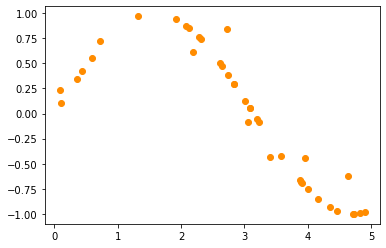

In [19]:
len(X)
X.min(); X.max()
plt.scatter(X, y, color="darkorange")

40

0.0

5.0

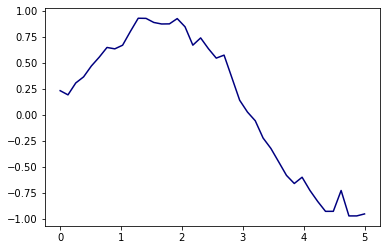

In [20]:
len(T)
T.min(); T.max()
plt.plot(T, y_, color="navy")

<AxesSubplot:>

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, "KNeighborsRegressor (k = 5, weights = 'uniform')")

<AxesSubplot:>

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, "KNeighborsRegressor (k = 5, weights = 'distance')")

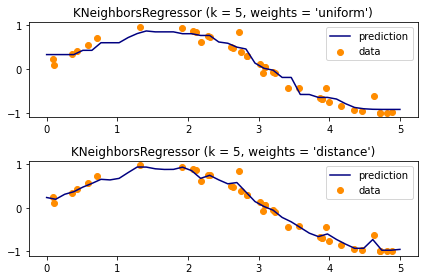

In [50]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()


# 2022/10/31, 월

In [6]:
p1 = 2156/5644
p2 = 3488/5644
p1*np.log2(p1)
p2*np.log2(p2)
entropy = -1*(p1*np.log2(p1) + p2*np.log2(p2))
entropy

-0.5303518614502657

-0.42908947590314284

0.9594413373534085

In [33]:
df = pd.read_csv('./data/ratings.csv')
df.columns = ['UserID', 'MovieID',  'Rating', 'Datetime']
df['Favorable'] = df.Rating > 3
df.head()
pd.to_datetime(df['Datetime'],unit='s')

UserID  MovieID  Rating    Datetime  Favorable
0       1      110     1.0  1425941529      False
1       1      147     4.5  1425942435       True
2       1      858     5.0  1425941523       True
3       1     1221     5.0  1425941546       True
4       1     1246     5.0  1425941556       True

0         2015-03-09 22:52:09
1         2015-03-09 23:07:15
2         2015-03-09 22:52:03
3         2015-03-09 22:52:26
4         2015-03-09 22:52:36
                  ...        
1048570   1998-09-25 20:29:26
1048571   1998-09-25 20:28:16
1048572   1998-09-25 20:09:45
1048573   1998-09-25 20:31:19
1048574   1998-09-26 17:59:39
Name: Datetime, Length: 1048575, dtype: datetime64[ns]

In [28]:
df.sample(10)

UserID  MovieID  Rating    Datetime  Favorable
216287    2323     1193     5.0  1421548043       True
652665    6650   135534     3.0  1449706160      False
891017    9095     2340     0.5  1468800844      False
151322    1579      417     4.0   939080781       True
176079    1843   116797     3.0  1454879735      False
165954    1730     4878     4.5  1186302873       True
747152    7581     2133     4.5  1283905186       True
292330    3109     3068     4.0  1049231822       True
239829    2527     4995     4.0  1018466899       True
304541    3238     1221     4.0  1161258373       True

In [29]:
df = df[df['UserID'].isin(range(200))]
df.head()

UserID  MovieID  Rating    Datetime  Favorable
0       1      110     1.0  1425941529      False
1       1      147     4.5  1425942435       True
2       1      858     5.0  1425941523       True
3       1     1221     5.0  1425941546       True
4       1     1246     5.0  1425941556       True

In [31]:
favorable_ratings = df[df['Favorable']]
favorable_ratings


UserID  MovieID  Rating    Datetime  Favorable
1           1      147     4.5  1425942435       True
2           1      858     5.0  1425941523       True
3           1     1221     5.0  1425941546       True
4           1     1246     5.0  1425941556       True
5           1     1968     4.0  1425942148       True
...       ...      ...     ...         ...        ...
15891     199     1148     5.0   900893807       True
15892     199     1265     4.0   900894067       True
15893     199     1569     4.0   900894112       True
15895     199     1784     4.0   900893913       True
15896     199     1918     4.0   900892031       True

[9796 rows x 5 columns]

In [6]:
pd.read_csv('https://github.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/blob/master/Chapter03/Datasets/Mall_Customers.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 28, saw 367


In [8]:
pd.read_csv('http://bit.ly/PMR-ch4')

cust_id        age  credit_score email  distance_to_store  online_visits  \
0          0  46.719825    735.837331   yes           9.186310              0   
1          1  39.283359    656.599440   yes           0.781894             46   
2          2  33.574168    665.934422   yes           1.204119             64   
3          3  43.564256    718.456166   yes           9.736359             29   
4          4  31.358552    626.323897   yes          33.782715              0   
..       ...        ...           ...   ...                ...            ...   
995      995  33.201993    754.122951   yes           3.992269              1   
996      996  33.614324    693.269270   yes           3.349372             20   
997      997  38.801882    734.186563   yes          25.988892              0   
998      998  36.334138    697.874698   yes           4.692822              0   
999      999  35.481512    659.341076   yes          17.533691             29   

     online_trans  online_spend  store_trans  store_spend  sat_service  \
0               0      0.000000            1    33.603505          NaN   
1              18    352.735573            0     0.000000          2.0   
2              21    355.833505            6   162.685187          4.0   
3              11    186.594784            1    51.327653          2.0   
4               0      0.000000            0     0.000000          NaN   
..            ...           ...          ...          ...          ...   
995             1     22.511958            0     0.000000          4.0   
996             7    149.810218            0     0.000000          4.0   
997             0      0.000000            2    60.881766          NaN   
998             0      0.000000            0     0.000000          NaN   
999             6    122.247640            0     0.000000          NaN   

     sat_selection  
0              NaN  
1              2.0  
2              4.0  
3              3.0  
4              NaN  
..             ...  
995            4.0  
996            3.0  
997            NaN  
998            NaN  
999            NaN  

[1000 rows x 12 columns]

In [9]:
pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter03/Datasets/Mall_Customers.csv')

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [4]:
# convert series to supervised learning
def series_to_supervised(data, n_lag=1, n_lead=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, … t-1)
    for i in range(n_lag, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)’ % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, … t+n)
    for i in range(0, n_lead):
        cols.append(df.shift(-i))
    if i == 0:
        names += [(‘var%d(t)’ % (j+1)) for j in range(n_vars)]
    else:
        names += [(‘var%d(t+%d)’ % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

SyntaxError: EOL while scanning string literal (<ipython-input-4-de95330a591f>, line 9)

In [2]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
! pip install opendatasets
import opendatasets

  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=eacefef67e3efcc94a54d49ccc8614f06ec0e2ca7aa76623cd361dd69f5a3146
  Stored in directory: c:\users\nfsi291\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [7]:
address = 'https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset'

In [9]:
#opendatasets.download(address)

In [2]:
import numpy as np
ACTIONS = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}

class Maze(object):
    def __init__(self):
        # start with defining your maze
        self.maze = np.zeroes((6, 6))
        self.maze[0, 0] = 2
        self.maze[5, :5] = 1
        self.maze[:4, 5] = 1
        self.maze[2, 2:] = 1
        self.maze[3, 2] = 1
        self.robot_position = (0, 0) # current robot position
        self.steps = 0 # contains num steps robot took
        self.allowed_states = None # for now, this is none
        self.construct_allowed_states() # not implemented yet

In [5]:
Maze(U)

NameError: name 'U' is not defined

In [6]:
segment_data = pd.read_csv('http://bit.ly/PMR-ch5')
segment_data.head()

Segment        age  gender         income  kids  own_home  subscribe
0  travelers  60.794945    male   57014.537526     0      True      False
1  travelers  61.764535  female   43796.941252     0     False      False
2  travelers  47.493356    male   51095.344683     0      True      False
3  travelers  60.963694    male   56457.722237     0      True       True
4  travelers  60.594199  female  103020.070798     0      True      False

In [11]:
segment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Segment    300 non-null    object 
 1   age        300 non-null    float64
 2   gender     300 non-null    object 
 3   income     300 non-null    float64
 4   kids       300 non-null    int64  
 5   own_home   300 non-null    bool   
 6   subscribe  300 non-null    bool   
dtypes: bool(2), float64(2), int64(1), object(2)
memory usage: 12.4+ KB


# 2022/10/24, Mon

In [7]:
from scipy.stats import chisquare
chisquare([16, 16, 16, 16, 16, 16])
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 15, 16, 13, 16, 8])

chisquare([16, 18, 16, 14, 12, 12], f_exp=[15, 16, 16, 16, 13, 8])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

Power_divergenceResult(statistic=3.676923076923077, pvalue=0.596801870784957)

Power_divergenceResult(statistic=2.6435897435897435, pvalue=0.7547316821638479)

In [12]:
np.array([[16, 18, 16, 14, 12, 12], [16, 15, 16, 13, 16, 8], [15, 16, 16, 16, 13, 8]])
pd.DataFrame(np.array([[16, 18, 16, 14, 12, 12], [16, 15, 16, 13, 16, 8], [15, 16, 16, 16, 13, 8]]))
data = pd.DataFrame(np.array([[16, 18, 16, 14, 12, 12], [16, 15, 16, 13, 16, 8], [15, 16, 16, 16, 13, 8]]))

array([[16, 18, 16, 14, 12, 12],
       [16, 15, 16, 13, 16,  8],
       [15, 16, 16, 16, 13,  8]])

0   1   2   3   4   5
0  16  18  16  14  12  12
1  16  15  16  13  16   8
2  15  16  16  16  13   8

In [18]:
chisquare(data.iloc[0, :], data.iloc[-1, :])

Power_divergenceResult(statistic=2.6435897435897435, pvalue=0.7547316821638479)

In [21]:
p_values =[]
for i in range(0, len(data)-1):
    p_values.append(chisquare(data.iloc[i, :], data.iloc[-1, :]).pvalue)
p_values

[0.7547316821638479, 0.9260582463650022]

In [24]:
data = np.array([[16, 18, 16, 14, 12, 12], [16, 15, 16, 13, 16, 8], [15, 16, 16, 16, 13, 8]])
data

array([[16, 18, 16, 14, 12, 12],
       [16, 15, 16, 13, 16,  8],
       [15, 16, 16, 16, 13,  8]])

In [27]:
data[0,:]
p_values =[]
for i in range(0, len(data)-1):
    p_values.append(chisquare(data[i, :], data[-1, :]).pvalue)
p_values

array([16, 18, 16, 14, 12, 12])

[0.7547316821638479, 0.9260582463650022]

# 2022/10/14, Fri

# tspiral
https://github.com/cerlymarco/tspiral

# Tensorflow 
https://www.tensorflow.org/tutorials/structured_data/time_series?hl=ko

In [2]:
import tensorflow as tf
import matplotlib as mpl
import os
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


# 2022/10/12, Wed

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
99      Adelie   Dream            43.2           18.5              192.0   
178  Chinstrap   Dream            50.5           18.4              200.0   
102     Adelie  Biscoe            37.7           16.0              183.0   
62      Adelie  Biscoe            37.6           17.0              185.0   
158  Chinstrap   Dream            46.1           18.2              178.0   

     body_mass_g     sex  
99        4100.0    Male  
178       3400.0  Female  
102       3075.0  Female  
62        3600.0  Female  
158       3250.0  Female

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

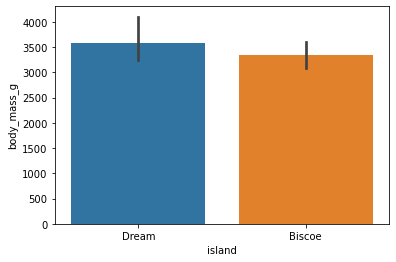

In [72]:
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
df.sample(5, random_state=1231)
sns.barplot(data=df.sample(5, random_state=1231), x="island", y="body_mass_g")

In [73]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml(name='mushroom', return_X_y = True)
data = pd.merge(X, y, left_index = True, right_index = True)
data.head()

cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0         x           s         n          t    p               f   
1         x           s         y          t    a               f   
2         b           s         w          t    l               f   
3         x           y         w          t    p               f   
4         x           s         g          f    n               f   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0            c         n          k           e  ...                      w   
1            c         b          k           e  ...                      w   
2            c         b          n           e  ...                      w   
3            c         n          n           e  ...                      w   
4            w         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o         p   
1                      w         p          w           o         p   
2                      w         p          w           o         p   
3                      w         p          w           o         p   
4                      w         p          w           o         e   

  spore-print-color population habitat class  
0                 k          s       u     p  
1                 n          n       g     e  
2                 n          n       m     e  
3                 k          s       u     p  
4                 n          a       g     e  

[5 rows x 23 columns]

In [74]:
data.reset_index()

index cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0         0         x           s         n          t    p               f   
1         1         x           s         y          t    a               f   
2         2         b           s         w          t    l               f   
3         3         x           y         w          t    p               f   
4         4         x           s         g          f    n               f   
...     ...       ...         ...       ...        ...  ...             ...   
8119   8119         k           s         n          f    n               a   
8120   8120         x           s         n          f    n               a   
8121   8121         f           s         n          f    n               a   
8122   8122         k           y         n          f    y               f   
8123   8123         x           s         n          f    n               a   

     gill-spacing gill-size gill-color  ... stalk-color-above-ring  \
0               c         n          k  ...                      w   
1               c         b          k  ...                      w   
2               c         b          n  ...                      w   
3               c         n          n  ...                      w   
4               w         b          k  ...                      w   
...           ...       ...        ...  ...                    ...   
8119            c         b          y  ...                      o   
8120            c         b          y  ...                      o   
8121            c         b          n  ...                      o   
8122            c         n          b  ...                      w   
8123            c         b          y  ...                      o   

     stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                         w         p          w           o         p   
1                         w         p          w           o         p   
2                         w         p          w           o         p   
3                         w         p          w           o         p   
4                         w         p          w           o         e   
...                     ...       ...        ...         ...       ...   
8119                      o         p          o           o         p   
8120                      o         p          n           o         p   
8121                      o         p          o           o         p   
8122                      w         p          w           o         e   
8123                      o         p          o           o         p   

     spore-print-color population habitat class  
0                    k          s       u     p  
1                    n          n       g     e  
2                    n          n       m     e  
3                    k          s       u     p  
4                    n          a       g     e  
...                ...        ...     ...   ...  
8119                 b          c       l     e  
8120                 b          v       l     e  
8121                 b          c       l     e  
8122                 w          v       l     p  
8123                 o          c       l     e  

[8124 rows x 24 columns]

cap-shape class  index
0          b     e    404
1          b     p     48
2          c     e      0
3          c     p      4
4          f     e   1596
5          f     p   1556
6          k     e    228
7          k     p    600
8          s     e     32
9          s     p      0
10         x     e   1948
11         x     p   1708

<AxesSubplot:xlabel='cap-shape', ylabel='index'>

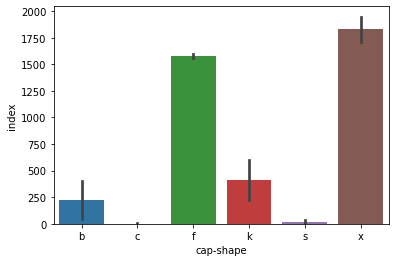

In [61]:
plot_data = data.reset_index().groupby(['cap-shape', 'class']).agg({'index':'count'}).reset_index()
plot_data
sns.barplot(x= plot_data['cap-shape'],
            y= plot_data['index'])
            #hue=plot_data['class']) 

In [55]:
def smallPlots(col, title, i):

  plot_data = data.reset_index().groupby([col, 'class']).agg({'index':'count'}).reset_index()

  sns.barplot(x=plot_data[col],
              y=plot_data['index'],
              hue=plot_data['class'], ax= ax[i])
  
  ax[i].set_title(title)

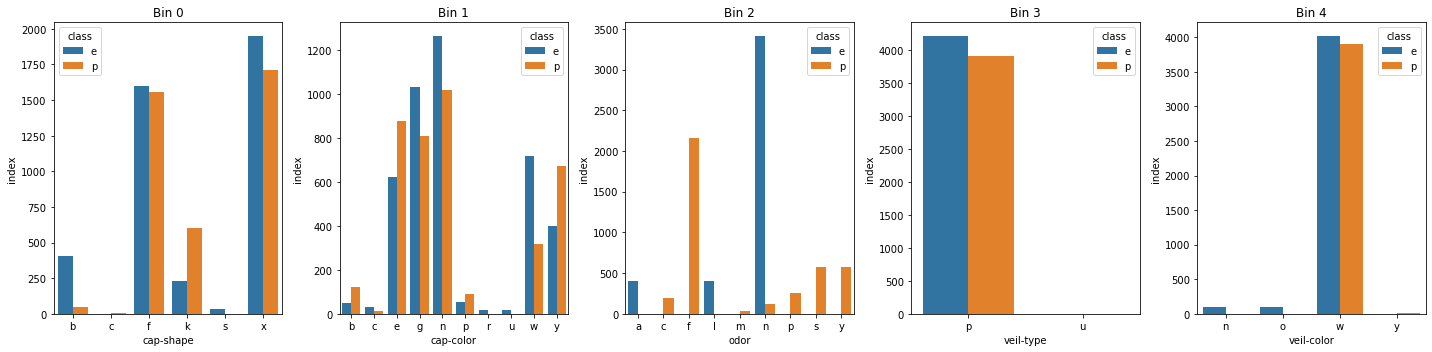

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

smallPlots('cap-shape' , 'Bin 0', 0)
smallPlots('cap-color' , 'Bin 1', 1)
smallPlots('odor' , 'Bin 2', 2)
smallPlots('veil-type' , 'Bin 3', 3)
smallPlots('veil-color' , 'Bin 4', 4)

fig.tight_layout()
plt.show()

In [15]:
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        if 'ipynb' == filename.strip('.')[-5:]:
            print(os.path.join(dirname, filename))
        else:
            pass

./04_Bias and Variance tradeoff.ipynb
./19_Clustering based on similarity matrix.ipynb
./arima-model-for-time-series-forecasting.ipynb
./assist_deep learning.ipynb
./Bayesian Belief Networks.ipynb
./Bayesian networks.ipynb
./complete-guide-on-time-series-analysis-in-python.ipynb
./convolutional-neural-network-cnn-tutorial.ipynb
./detection-using-isolation-forest-and-autoencoder.ipynb
./dimensionality-reduction-using-keras-auto-encoder.ipynb
./everydaystudy.ipynb
./Gibbs_BBN.ipynb
./III. Temporal Structure.ipynb
./makeamoney.ipynb
./MCMC.ipynb
./projects_timeseries.ipynb
./weekly study.ipynb
./.ipynb_checkpoints\04_Bias and Variance tradeoff-checkpoint.ipynb
./.ipynb_checkpoints\19_Clustering based on similarity matrix-checkpoint.ipynb
./.ipynb_checkpoints\arima-model-for-time-series-forecasting-checkpoint.ipynb
./.ipynb_checkpoints\assist_deep learning-checkpoint.ipynb
./.ipynb_checkpoints\Bayesian Belief Networks-checkpoint.ipynb
./.ipynb_checkpoints\Bayesian networks-checkpoint.ipynb

# 2022/10/11, Tue
## Forecasting with Decision Trees and Random Forests
https://towardsdatascience.com/forecasting-with-decision-trees-and-random-forests-ac081ff451ec

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

#create data with linear trend
np.random.seed(123)
t = np.arange(100)
y = t + 2 * np.random.normal(size = 100)#linear trend

t_train = t[:50].reshape(-1,1)
t_test = t[50:].reshape(-1,1)

### In words: For any forecast, our model always predicts the average of the final training interval. Which is clearly useless…

DecisionTreeRegressor(max_depth=4)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Decision Tree VS. Time-Series with seasonality')

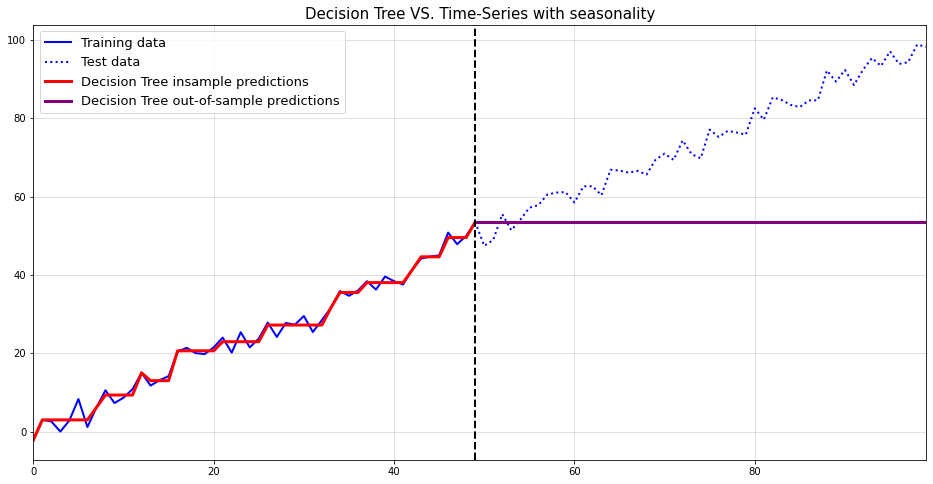

In [4]:
y_train = y[:50]
y_test = y[50:]

tree = DecisionTreeRegressor(max_depth = 4)
tree.fit(t_train, y_train)

y_pred_train = tree.predict(t_train)
y_pred_test = tree.predict(t_test)

plt.figure(figsize = (16,8))
plt.plot(t_train.reshape(-1), y_train, label = "Training data", color="blue", lw=2)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_train[-1]],y_test]), label = "Test data", 
         color="blue", ls = "dotted", lw=2)


plt.plot(t_train.reshape(-1), y_pred_train, label = "Decision Tree insample predictions", 
         color="red", lw = 3)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_pred_train[-1]],y_pred_test]), label = "Decision Tree out-of-sample predictions", 
         color="purple", lw=3)

plt.grid(alpha = 0.5)
plt.axvline(t_train[-1], color="black", lw=2, ls="dashed")
plt.legend(fontsize=13)
plt.title("Decision Tree VS. Time-Series with seasonality", fontsize=15)

plt.margins(x=0)

### The same issues obviously arise for seasonal patterns as well:

DecisionTreeRegressor(max_depth=4)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Decision Tree VS. Time-Series with seasonality')

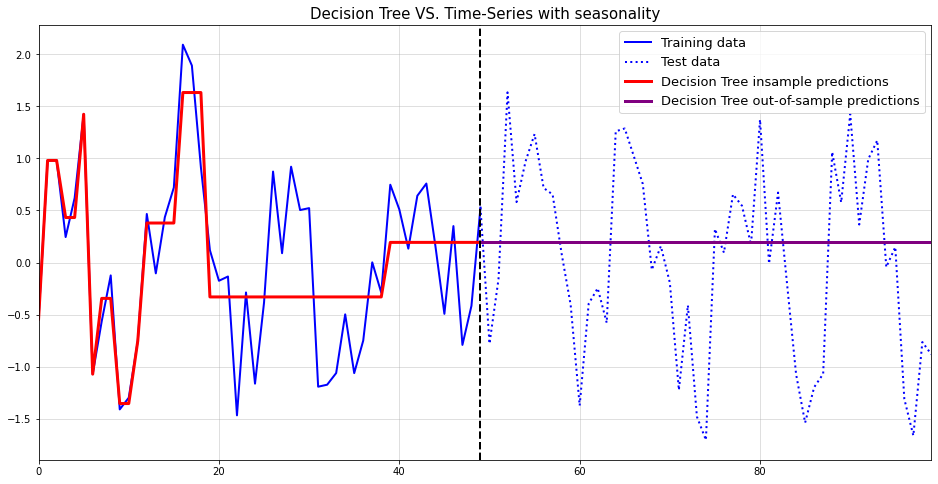

In [5]:
#create data with seasonality 
np.random.seed(123)
t = np.arange(100)
y = np.sin(0.5 * t) + 0.5 * np.random.normal(size = 100)#sine seasonality

t_train = t[:50].reshape(-1,1)
t_test = t[50:].reshape(-1,1)

y_train = y[:50]
y_test = y[50:]

tree = DecisionTreeRegressor(max_depth = 4)
tree.fit(t_train, y_train)

y_pred_train = tree.predict(t_train)
y_pred_test = tree.predict(t_test)

plt.figure(figsize = (16,8))
plt.plot(t_train.reshape(-1), y_train, label = "Training data", color="blue", lw=2)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_train[-1]],y_test]), label = "Test data", 
         color="blue", ls = "dotted", lw=2)


plt.plot(t_train.reshape(-1), y_pred_train, label = "Decision Tree insample predictions", 
         color="red", lw = 3)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_pred_train[-1]],y_pred_test]), label = "Decision Tree out-of-sample predictions", 
         color="purple", lw=3)

plt.grid(alpha = 0.5)
plt.axvline(t_train[-1], color="black", lw=2, ls="dashed")
plt.legend(fontsize=13)
plt.title("Decision Tree VS. Time-Series with seasonality", fontsize=15)

plt.margins(x=0)

To generalize the above in a single sentence:

Decision Trees fail for out-of-distribution data but in regression against time, every future point in time is out-of-distribution.

Thus, we need to find a different approach.

## Decision Trees for auto-regressive forecasting

DecisionTreeRegressor(max_depth=2)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Decision Tree VS. Time-Series with linear trend')

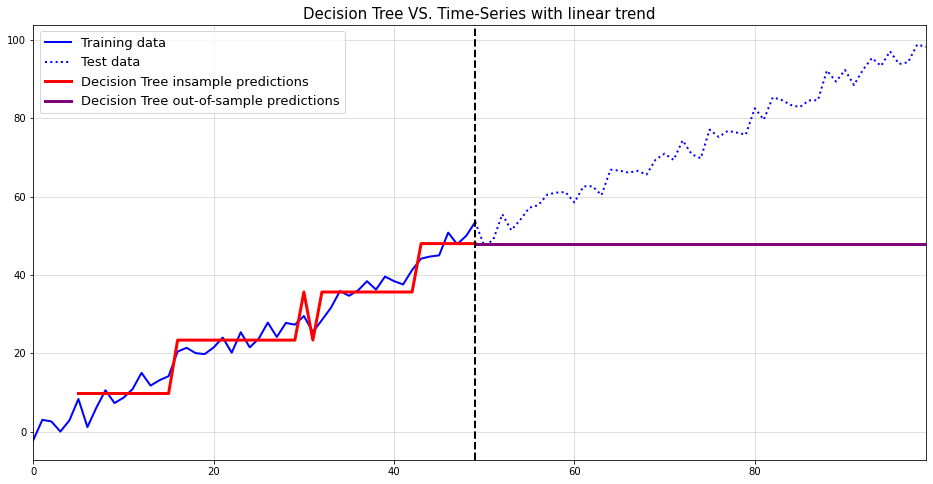

In [2]:
y_train = y[:50]
X_train_shift = np.concatenate([pd.Series(y_train).shift(t).values.reshape(-1,1) for t in range(1,6)],1)[5:,:]
y_train_shift = y_train[5:]
y_test = y[50:]

tree = DecisionTreeRegressor(max_depth = 2)
tree.fit(X_train_shift, y_train_shift)

y_pred_train = tree.predict(X_train_shift).reshape(-1)

Xt = np.concatenate([X_train_shift[-1,1:].reshape(1,-1),np.array(y_train_shift[-1]).reshape(1,1)],1)
predictions_test = []

for t in range(len(y_test)):
    pred = tree.predict(Xt)
    predictions_test.append(pred[0])
    Xt = np.concatenate([Xt[-1,1:].reshape(1,-1),np.array(pred).reshape(1,1)],1)
    
y_pred_test = np.array(predictions_test)


plt.figure(figsize = (16,8))
plt.plot(t_train.reshape(-1), y_train, label = "Training data", color="blue", lw=2)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_train[-1]],y_test]), label = "Test data", 
         color="blue", ls = "dotted", lw=2)


plt.plot(t_train.reshape(-1)[5:], y_pred_train, label = "Decision Tree insample predictions", 
         color="red", lw = 3)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_pred_train[-1]],y_pred_test]), label = "Decision Tree out-of-sample predictions", 
         color="purple", lw=3)

plt.grid(alpha = 0.5)
plt.axvline(t_train[-1], color="black", lw=2, ls="dashed")
plt.legend(fontsize=13)
plt.title("Decision Tree VS. Time-Series with linear trend", fontsize=15)

plt.margins(x=0)

Again, not useful at all. To fix this last issue, we need to first remove the trend. Then we can fit the model, forecast the time-series and ‘re-trend’ the forecast.

### For de-trending, we basically have two options:

1. Fit a linear trend model — here we regress the time-series against time in a linear regression model. Its predictions are then subtracted from the training data to create a stationary time-series. This removes a constant, deterministic trend.
2. Use first-differences — in this approach, we transform the time-series via first order differencing. In addition to the deterministic trend, this approach can also remove stochastic trends.

DecisionTreeRegressor(max_depth=1)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Decision Tree VS. Time-Series with linear trend')

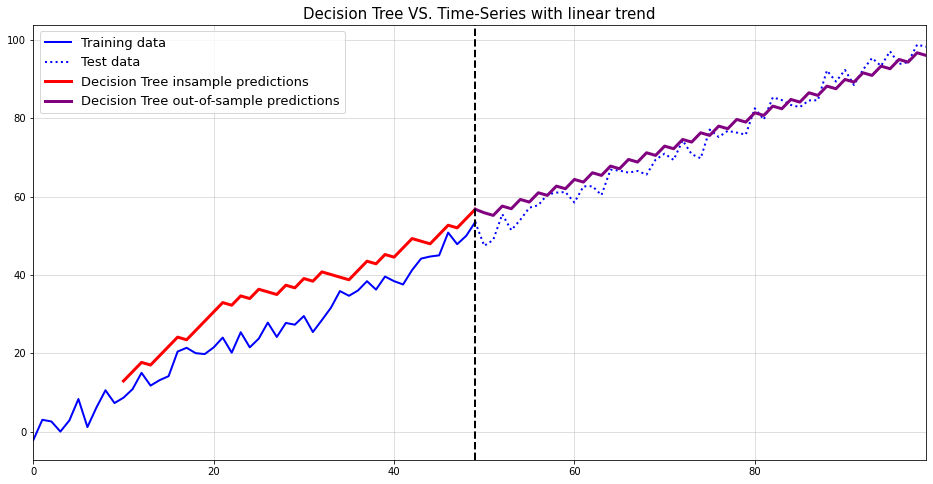

In [7]:
#create data with linear trend
np.random.seed(123)
t = np.arange(100)
y = t + 2* np.random.normal(size = 100)#linear trend

t_train = t[:50].reshape(-1,1)
t_test = t[50:].reshape(-1,1)


n_lags = 10

y_train = y[:50]
X_train_shift = pd.concat([pd.DataFrame(y_train).shift(t) for t in range(1,n_lags)],1).diff().values[n_lags:,:]
y_train_shift = np.diff(y_train)[n_lags-1:]
y_test = y[50:]

tree = DecisionTreeRegressor(max_depth = 1)
tree.fit(X_train_shift, y_train_shift)

y_pred_train = tree.predict(X_train_shift).reshape(-1)

Xt = np.concatenate([X_train_shift[-1,1:].reshape(1,-1),np.array(y_train_shift[-1]).reshape(1,1)],1)
predictions_test = []

for t in range(len(y_test)):
    pred = tree.predict(Xt)
    predictions_test.append(pred[0])
    Xt = np.concatenate([np.array(pred).reshape(1,1),Xt[-1,1:].reshape(1,-1)],1)
    
y_pred_test = np.array(predictions_test)

y_pred_train = y_train[n_lags-2]+np.cumsum(y_pred_train)
y_pred_test = y_train[-1]+np.cumsum(y_pred_test)



plt.figure(figsize = (16,8))
plt.plot(t_train.reshape(-1), y_train, label = "Training data", color="blue", lw=2)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_train[-1]],y_test]), label = "Test data", 
         color="blue", ls = "dotted", lw=2)


plt.plot(t_train.reshape(-1)[n_lags:], y_pred_train, label = "Decision Tree insample predictions", 
         color="red", lw = 3)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_pred_train[-1]],y_pred_test]), label = "Decision Tree out-of-sample predictions", 
         color="purple", lw=3)

plt.grid(alpha = 0.5)
plt.axvline(t_train[-1], color="black", lw=2, ls="dashed")
plt.legend(fontsize=13)
plt.title("Decision Tree VS. Time-Series with linear trend", fontsize=15)

plt.margins(x=0)

# Time Series Forecasting on Power Consumption
### This article aims at leveraging time series analysis to predict Power Consumption in the city of Tétouan, Morocco
https://towardsdatascience.com/time-series-forecasting-on-power-consumption-273d56768b99

In [12]:
# Load data from URL using pandas read_csv method
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')
df.head()

DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1                20131.08434  
2                19668.43373  
3                18899.27711  
4                18442.40964

In [13]:
df.describe()

Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000              13895.696200                8560.081466   
25%         0.122000              26310.668692               16980.766032   
50%         4.456000              32265.920340               20823.168405   
75%       101.000000              37309.018185               24713.717520   
max       936.000000              52204.395120               37408.860760   

       Zone 3  Power Consumption  
count               52416.000000  
mean                17835.406218  
std                  6622.165099  
min                  5935.174070  
25%                 13129.326630  
50%                 16415.117470  
75%                 21624.100420  
max                 47598.326360

In [14]:
#transforming DateTime column into index
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)
df

Temperature  Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                        
2017-01-01 00:00:00        6.559      73.8       0.083                  0.051   
2017-01-01 00:10:00        6.414      74.5       0.083                  0.070   
2017-01-01 00:20:00        6.313      74.5       0.080                  0.062   
2017-01-01 00:30:00        6.121      75.0       0.083                  0.091   
2017-01-01 00:40:00        5.921      75.7       0.081                  0.048   
...                          ...       ...         ...                    ...   
2017-12-30 23:10:00        7.010      72.4       0.080                  0.040   
2017-12-30 23:20:00        6.947      72.6       0.082                  0.051   
2017-12-30 23:30:00        6.900      72.8       0.086                  0.084   
2017-12-30 23:40:00        6.758      73.0       0.080                  0.066   
2017-12-30 23:50:00        6.580      74.1       0.081                  0.062   

                     diffuse flows  Zone 1 Power Consumption  \
DateTime                                                       
2017-01-01 00:00:00          0.119               34055.69620   
2017-01-01 00:10:00          0.085               29814.68354   
2017-01-01 00:20:00          0.100               29128.10127   
2017-01-01 00:30:00          0.096               28228.86076   
2017-01-01 00:40:00          0.085               27335.69620   
...                            ...                       ...   
2017-12-30 23:10:00          0.096               31160.45627   
2017-12-30 23:20:00          0.093               30430.41825   
2017-12-30 23:30:00          0.074               29590.87452   
2017-12-30 23:40:00          0.089               28958.17490   
2017-12-30 23:50:00          0.111               28349.80989   

                     Zone 2  Power Consumption  Zone 3  Power Consumption  
DateTime                                                                   
2017-01-01 00:00:00                16128.87538                20240.96386  
2017-01-01 00:10:00                19375.07599                20131.08434  
2017-01-01 00:20:00                19006.68693                19668.43373  
2017-01-01 00:30:00                18361.09422                18899.27711  
2017-01-01 00:40:00                17872.34043                18442.40964  
...                                        ...                        ...  
2017-12-30 23:10:00                26857.31820                14780.31212  
2017-12-30 23:20:00                26124.57809                14428.81152  
2017-12-30 23:30:00                25277.69254                13806.48259  
2017-12-30 23:40:00                24692.23688                13512.60504  
2017-12-30 23:50:00                24055.23167                13345.49820  

[52416 rows x 8 columns]

In [18]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

df.head()

Temperature  Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                        
2017-01-01 00:00:00        6.559      73.8       0.083                  0.051   
2017-01-01 00:10:00        6.414      74.5       0.083                  0.070   
2017-01-01 00:20:00        6.313      74.5       0.080                  0.062   
2017-01-01 00:30:00        6.121      75.0       0.083                  0.091   
2017-01-01 00:40:00        5.921      75.7       0.081                  0.048   

                     diffuse flows  Zone 1 Power Consumption  \
DateTime                                                       
2017-01-01 00:00:00          0.119               34055.69620   
2017-01-01 00:10:00          0.085               29814.68354   
2017-01-01 00:20:00          0.100               29128.10127   
2017-01-01 00:30:00          0.096               28228.86076   
2017-01-01 00:40:00          0.085               27335.69620   

                     Zone 2  Power Consumption  Zone 3  Power Consumption  \
DateTime                                                                    
2017-01-01 00:00:00                16128.87538                20240.96386   
2017-01-01 00:10:00                19375.07599                20131.08434   
2017-01-01 00:20:00                19006.68693                19668.43373   
2017-01-01 00:30:00                18361.09422                18899.27711   
2017-01-01 00:40:00                17872.34043                18442.40964   

                     hour  dayofweek  quarter  month  year  dayofyear  \
DateTime                                                                
2017-01-01 00:00:00     0          6        1      1  2017          1   
2017-01-01 00:10:00     0          6        1      1  2017          1   
2017-01-01 00:20:00     0          6        1      1  2017          1   
2017-01-01 00:30:00     0          6        1      1  2017          1   
2017-01-01 00:40:00     0          6        1      1  2017          1   

                     dayofmonth  weekofyear  
DateTime                                     
2017-01-01 00:00:00           1          52  
2017-01-01 00:10:00           1          52  
2017-01-01 00:20:00           1          52  
2017-01-01 00:30:00           1          52  
2017-01-01 00:40:00           1          52

In [17]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'hour',
       'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth',
       'weekofyear'],
      dtype='object')

In [31]:
plt.rcParams["figure.figsize"] = (15,4)

<AxesSubplot:xlabel='DateTime'>

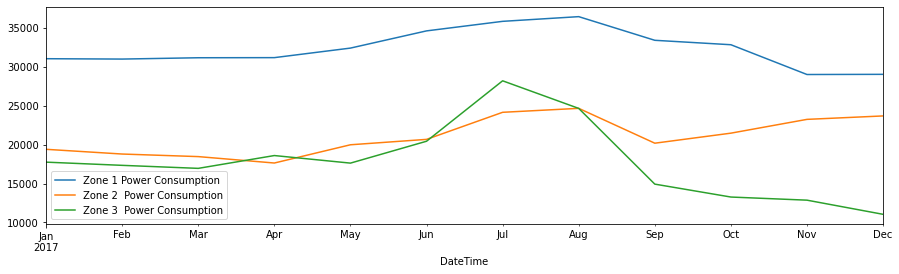

In [32]:
df.resample('m')['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'].mean().plot()

<AxesSubplot:xlabel='hour'>

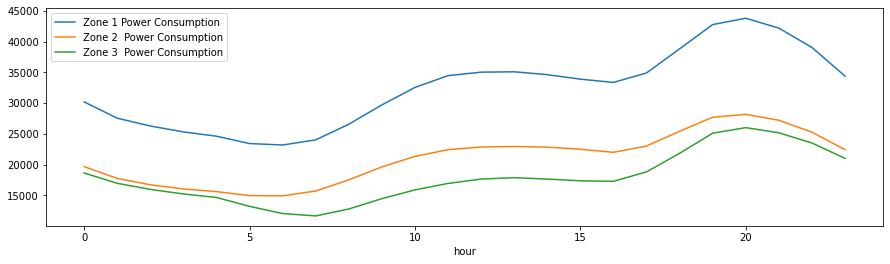

In [33]:
df.groupby('hour')['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'].mean().plot()

In [63]:
df.head()

Temperature  Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                        
2017-01-01 00:00:00        6.559      73.8       0.083                  0.051   
2017-01-01 00:10:00        6.414      74.5       0.083                  0.070   
2017-01-01 00:20:00        6.313      74.5       0.080                  0.062   
2017-01-01 00:30:00        6.121      75.0       0.083                  0.091   
2017-01-01 00:40:00        5.921      75.7       0.081                  0.048   

                     diffuse flows  Zone 1 Power Consumption  \
DateTime                                                       
2017-01-01 00:00:00          0.119               34055.69620   
2017-01-01 00:10:00          0.085               29814.68354   
2017-01-01 00:20:00          0.100               29128.10127   
2017-01-01 00:30:00          0.096               28228.86076   
2017-01-01 00:40:00          0.085               27335.69620   

                     Zone 2  Power Consumption  Zone 3  Power Consumption  \
DateTime                                                                    
2017-01-01 00:00:00                16128.87538                20240.96386   
2017-01-01 00:10:00                19375.07599                20131.08434   
2017-01-01 00:20:00                19006.68693                19668.43373   
2017-01-01 00:30:00                18361.09422                18899.27711   
2017-01-01 00:40:00                17872.34043                18442.40964   

                     hour  dayofweek  quarter  month  year  dayofyear  \
DateTime                                                                
2017-01-01 00:00:00     0          6        1      1  2017          1   
2017-01-01 00:10:00     0          6        1      1  2017          1   
2017-01-01 00:20:00     0          6        1      1  2017          1   
2017-01-01 00:30:00     0          6        1      1  2017          1   
2017-01-01 00:40:00     0          6        1      1  2017          1   

                     dayofmonth  weekofyear  
DateTime                                     
2017-01-01 00:00:00           1          52  
2017-01-01 00:10:00           1          52  
2017-01-01 00:20:00           1          52  
2017-01-01 00:30:00           1          52  
2017-01-01 00:40:00           1          52

In [72]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'hour',
       'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth',
       'weekofyear'],
      dtype='object')

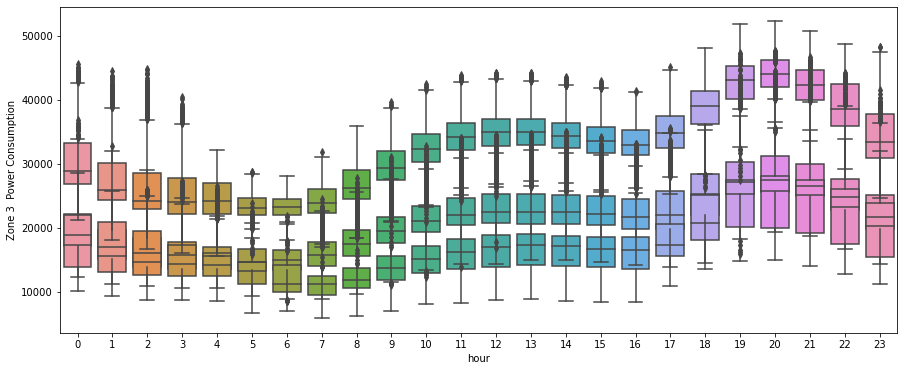

In [89]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,6)

ax = sns.boxplot(x="hour", y="Zone 1 Power Consumption", data=df)  # RUN PLOT   
ax = sns.boxplot(x="hour", y="Zone 2  Power Consumption", data=df)  # RUN PLOT 
ax = sns.boxplot(x="hour", y="Zone 3  Power Consumption", data=df)  # RUN PLOT 

In [90]:
import plotly.express as px
fig = px.box(df, x="hour", y="Zone 1 Power Consumption")
fig.show() # fig

In [91]:
df.head()

Temperature  Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                        
2017-01-01 00:00:00        6.559      73.8       0.083                  0.051   
2017-01-01 00:10:00        6.414      74.5       0.083                  0.070   
2017-01-01 00:20:00        6.313      74.5       0.080                  0.062   
2017-01-01 00:30:00        6.121      75.0       0.083                  0.091   
2017-01-01 00:40:00        5.921      75.7       0.081                  0.048   

                     diffuse flows  Zone 1 Power Consumption  \
DateTime                                                       
2017-01-01 00:00:00          0.119               34055.69620   
2017-01-01 00:10:00          0.085               29814.68354   
2017-01-01 00:20:00          0.100               29128.10127   
2017-01-01 00:30:00          0.096               28228.86076   
2017-01-01 00:40:00          0.085               27335.69620   

                     Zone 2  Power Consumption  Zone 3  Power Consumption  \
DateTime                                                                    
2017-01-01 00:00:00                16128.87538                20240.96386   
2017-01-01 00:10:00                19375.07599                20131.08434   
2017-01-01 00:20:00                19006.68693                19668.43373   
2017-01-01 00:30:00                18361.09422                18899.27711   
2017-01-01 00:40:00                17872.34043                18442.40964   

                     hour  dayofweek  quarter  month  year  dayofyear  \
DateTime                                                                
2017-01-01 00:00:00     0          6        1      1  2017          1   
2017-01-01 00:10:00     0          6        1      1  2017          1   
2017-01-01 00:20:00     0          6        1      1  2017          1   
2017-01-01 00:30:00     0          6        1      1  2017          1   
2017-01-01 00:40:00     0          6        1      1  2017          1   

                     dayofmonth  weekofyear  
DateTime                                     
2017-01-01 00:00:00           1          52  
2017-01-01 00:10:00           1          52  
2017-01-01 00:20:00           1          52  
2017-01-01 00:30:00           1          52  
2017-01-01 00:40:00           1          52

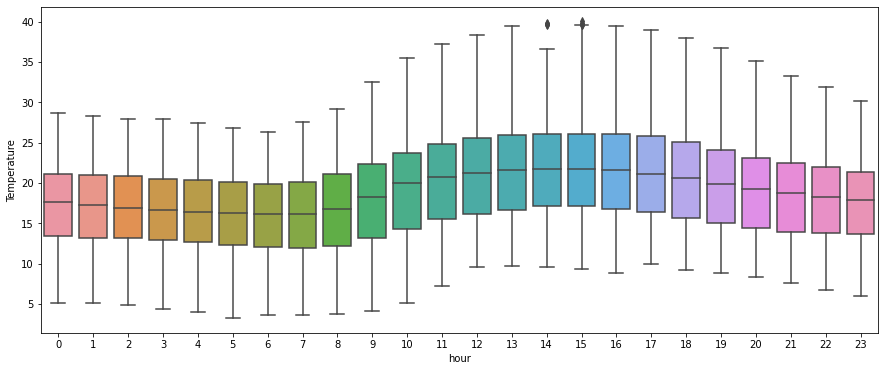

In [92]:
ax = sns.boxplot(x="hour", y="Temperature", data=df)

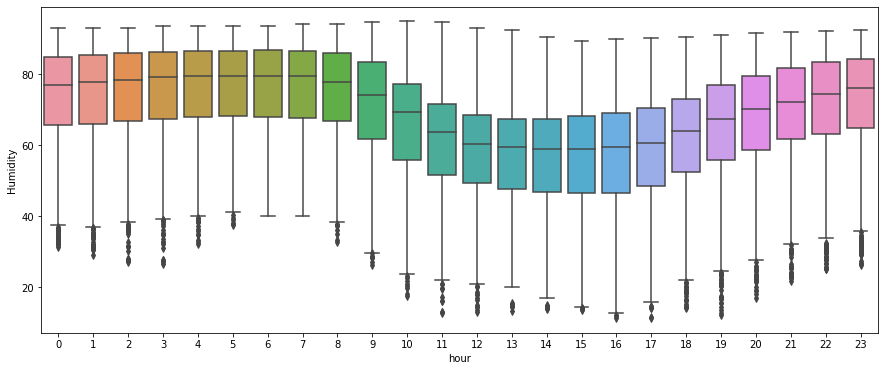

In [93]:
ax = sns.boxplot(x="hour", y="Humidity", data=df)

In [97]:
df[['Temperature', 'Humidity', 'Wind Speed']].corr()

Temperature  Humidity  Wind Speed
Temperature     1.000000 -0.460243    0.477109
Humidity       -0.460243  1.000000   -0.135853
Wind Speed      0.477109 -0.135853    1.000000

## A simple moving average (SMA) 
is a fundamental piece of information to smoothen our predictions. A moving average calculates the mean of all the data points in a time series in order to extract valuable information for the prediction algorithm.

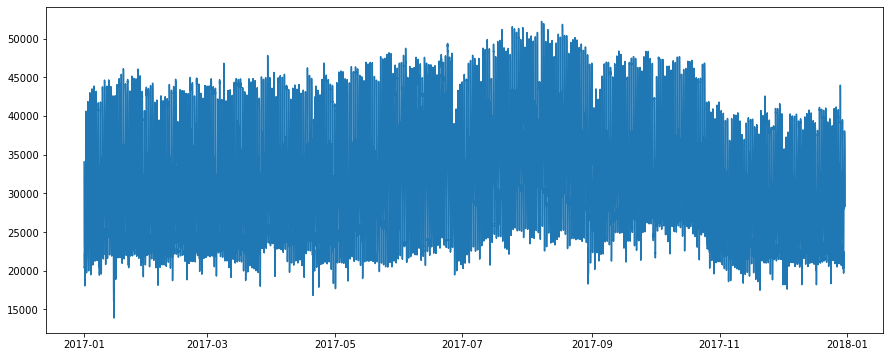

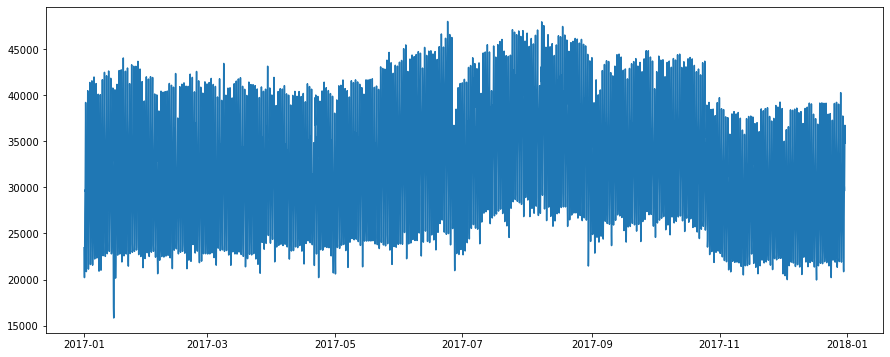

In [104]:
#Calculating moving average
df['SMA30'] = df['Zone 1 Power Consumption'].rolling(30).mean()
df['SMA15'] = df['Zone 1 Power Consumption'].rolling(15).mean()
plt.plot(df['Zone 1 Power Consumption']); plt.show()
plt.plot(df['SMA30'])

## Train Test Split

# 2022/10/07, Fri

# 1.1. Linear Models
## 1.1.1. Ordinary Least Squares

In [25]:
x = np.arange(3)
x = np.arange(15).reshape(3,5)
x
x.shape
np.newaxis is None

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

(3, 5)

True

In [26]:
x[:, np.newaxis]
x[:, np.newaxis].shape
x[np.newaxis, :]
x[np.newaxis, :].shape

array([[[ 0,  1,  2,  3,  4]],

       [[ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14]]])

(3, 1, 5)

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]])

(1, 3, 5)

In [28]:
x[:, np.newaxis, 2]

array([[ 2],
       [ 7],
       [12]])

In [45]:
from sklearn import datasets
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X.shape
diabetes_X[0:10]

(442, 10)

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944183, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04117617, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599898, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [46]:
diabetes_X[:, np.newaxis, 1].shape
diabetes_X[:, np.newaxis, 0][0:10]

(442, 1)

array([[ 0.03807591],
       [-0.00188202],
       [ 0.08529891],
       [-0.08906294],
       [ 0.00538306],
       [-0.09269548],
       [-0.04547248],
       [ 0.06350368],
       [ 0.04170844],
       [-0.07090025]])

In [47]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X.shape
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

(442, 1)

In [48]:
diabetes_X[:-20].shape
diabetes_X[-20:].shape

(422, 1)

(20, 1)

In [52]:
x = np.arange(100)
x.shape
x
x[-5:]

(100,)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

array([95, 96, 97, 98, 99])

In [54]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_
reg.intercept_

LinearRegression()

array([0.5, 0.5])

1.1102230246251565e-16

In [ ]:
[[0, 0], [1, 1], [2, 2]], [0, 1, 2]

In [64]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
X
X.shape
pd.DataFrame(X).style

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

(10, 10)

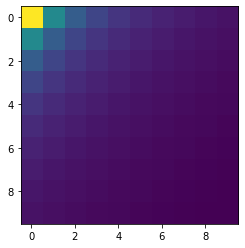

In [60]:
plt.imshow(X)

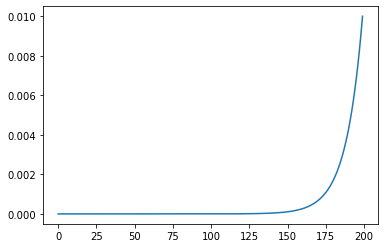

In [71]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
plt.plot(alphas)

In [72]:
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

Ridge(alpha=1e-10, fit_intercept=False)

Ridge(alpha=1.0969857978923818e-10, fit_intercept=False)

Ridge(alpha=1.2033778407775904e-10, fit_intercept=False)

Ridge(alpha=1.3200884008314168e-10, fit_intercept=False)

Ridge(alpha=1.448118227674536e-10, fit_intercept=False)

Ridge(alpha=1.5885651294280527e-10, fit_intercept=False)

Ridge(alpha=1.742633386009647e-10, fit_intercept=False)

Ridge(alpha=1.9116440753857038e-10, fit_intercept=False)

Ridge(alpha=2.0970464013232307e-10, fit_intercept=False)

Ridge(alpha=2.3004301197729216e-10, fit_intercept=False)

Ridge(alpha=2.523539170434766e-10, fit_intercept=False)

Ridge(alpha=2.768286630392061e-10, fit_intercept=False)

Ridge(alpha=3.0367711180354607e-10, fit_intercept=False)

Ridge(alpha=3.33129478793467e-10, fit_intercept=False)

Ridge(alpha=3.654383070957262e-10, fit_intercept=False)

Ridge(alpha=4.0088063288984644e-10, fit_intercept=False)

Ridge(alpha=4.3976036093027124e-10, fit_intercept=False)

Ridge(alpha=4.824108704165374e-10, fit_intercept=False)

Ridge(alpha=5.291978735958437e-10, fit_intercept=False)

Ridge(alpha=5.805225516094908e-10, fit_intercept=False)

Ridge(alpha=6.368249944718586e-10, fit_intercept=False)

Ridge(alpha=6.985879746785234e-10, fit_intercept=False)

Ridge(alpha=7.663410868007463e-10, fit_intercept=False)

Ridge(alpha=8.406652885618317e-10, fit_intercept=False)

Ridge(alpha=9.221978823334341e-10, fit_intercept=False)

Ridge(alpha=1.011637979766207e-09, fit_intercept=False)

Ridge(alpha=1.10975249641207e-09, fit_intercept=False)

Ridge(alpha=1.2173827277396621e-09, fit_intercept=False)

Ridge(alpha=1.3354515629298974e-09, fit_intercept=False)

Ridge(alpha=1.4649713983072878e-09, fit_intercept=False)

Ridge(alpha=1.6070528182616385e-09, fit_intercept=False)

Ridge(alpha=1.7629141180959444e-09, fit_intercept=False)

Ridge(alpha=1.933891750455232e-09, fit_intercept=False)

Ridge(alpha=2.1214517849106276e-09, fit_intercept=False)

Ridge(alpha=2.327202478960412e-09, fit_intercept=False)

Ridge(alpha=2.5529080682395164e-09, fit_intercept=False)

Ridge(alpha=2.8005038941836253e-09, fit_intercept=False)

Ridge(alpha=3.072112998861759e-09, fit_intercept=False)

Ridge(alpha=3.3700643292719246e-09, fit_intercept=False)

Ridge(alpha=3.6969127071950323e-09, fit_intercept=False)

Ridge(alpha=4.055460735840828e-09, fit_intercept=False)

Ridge(alpha=4.448782831127577e-09, fit_intercept=False)

Ridge(alpha=4.8802515836544335e-09, fit_intercept=False)

Ridge(alpha=5.3535666774107186e-09, fit_intercept=False)

Ridge(alpha=5.872786613189489e-09, fit_intercept=False)

Ridge(alpha=6.4423635087213705e-09, fit_intercept=False)

Ridge(alpha=7.067181273927477e-09, fit_intercept=False)

Ridge(alpha=7.752597488629465e-09, fit_intercept=False)

Ridge(alpha=8.504489341802669e-09, fit_intercept=False)

Ridge(alpha=9.329304026284696e-09, fit_intercept=False)

Ridge(alpha=1.0234114021054527e-08, fit_intercept=False)

Ridge(alpha=1.1226677735108136e-08, fit_intercept=False)

Ridge(alpha=1.2315506032928261e-08, fit_intercept=False)

Ridge(alpha=1.3509935211980251e-08, fit_intercept=False)

Ridge(alpha=1.4820207057988601e-08, fit_intercept=False)

Ridge(alpha=1.6257556664437936e-08, fit_intercept=False)

Ridge(alpha=1.7834308769319092e-08, fit_intercept=False)

Ridge(alpha=1.9563983435170648e-08, fit_intercept=False)

Ridge(alpha=2.1461411978584014e-08, fit_intercept=False)

Ridge(alpha=2.3542864143224203e-08, fit_intercept=False)

Ridge(alpha=2.5826187606826747e-08, fit_intercept=False)

Ridge(alpha=2.8330961018393243e-08, fit_intercept=False)

Ridge(alpha=3.107866187782014e-08, fit_intercept=False)

Ridge(alpha=3.4092850697468076e-08, fit_intercept=False)

Ridge(alpha=3.7399373024788015e-08, fit_intercept=False)

Ridge(alpha=4.1026581058271906e-08, fit_intercept=False)

Ridge(alpha=4.5005576757004975e-08, fit_intercept=False)

Ridge(alpha=4.9370478528390036e-08, fit_intercept=False)

Ridge(alpha=5.415871378079465e-08, fit_intercept=False)

Ridge(alpha=5.94113398496504e-08, fit_intercept=False)

Ridge(alpha=6.51733960488242e-08, fit_intercept=False)

Ridge(alpha=7.149428986597577e-08, fit_intercept=False)

Ridge(alpha=7.842822061337681e-08, fit_intercept=False)

Ridge(alpha=8.603464416684492e-08, fit_intercept=False)

Ridge(alpha=9.437878277775391e-08, fit_intercept=False)

Ridge(alpha=1.0353218432956616e-07, fit_intercept=False)

Ridge(alpha=1.1357333583431052e-07, fit_intercept=False)

Ridge(alpha=1.2458833642950082e-07, fit_intercept=False)

Ridge(alpha=1.3667163564620074e-07, fit_intercept=False)

Ridge(alpha=1.499268432786047e-07, fit_intercept=False)

Ridge(alpha=1.6446761779946628e-07, fit_intercept=False)

Ridge(alpha=1.804186409392072e-07, fit_intercept=False)

Ridge(alpha=1.9791668678535572e-07, fit_intercept=False)

Ridge(alpha=2.1711179456945052e-07, fit_intercept=False)

Ridge(alpha=2.3816855519761606e-07, fit_intercept=False)

Ridge(alpha=2.6126752255633264e-07, fit_intercept=False)

Ridge(alpha=2.8660676169482504e-07, fit_intercept=False)

Ridge(alpha=3.1440354715915e-07, fit_intercept=False)

Ridge(alpha=3.44896226040576e-07, fit_intercept=False)

Ridge(alpha=3.783462617131933e-07, fit_intercept=False)

Ridge(alpha=4.1504047578504725e-07, fit_intercept=False)

Ridge(alpha=4.5529350748669477e-07, fit_intercept=False)

Ridge(alpha=4.99450511585514e-07, fit_intercept=False)

Ridge(alpha=5.478901179593945e-07, fit_intercept=False)

Ridge(alpha=6.010276782070388e-07, fit_intercept=False)

Ridge(alpha=6.593188271333542e-07, fit_intercept=False)

Ridge(alpha=7.232633896483533e-07, fit_intercept=False)

Ridge(alpha=7.934096665797492e-07, fit_intercept=False)

Ridge(alpha=8.703591361485166e-07, fit_intercept=False)

Ridge(alpha=9.547716114208066e-07, fit_intercept=False)

Ridge(alpha=1.0473708979594487e-06, fit_intercept=False)

Ridge(alpha=1.1489510001873085e-06, fit_intercept=False)

Ridge(alpha=1.2603829296797275e-06, fit_intercept=False)

Ridge(alpha=1.3826221737646564e-06, fit_intercept=False)

Ridge(alpha=1.5167168884709241e-06, fit_intercept=False)

Ridge(alpha=1.6638168860761274e-06, fit_intercept=False)

Ridge(alpha=1.8251834943190425e-06, fit_intercept=False)

Ridge(alpha=2.0022003718155846e-06, fit_intercept=False)

Ridge(alpha=2.196385372416547e-06, fit_intercept=False)

Ridge(alpha=2.409403560239527e-06, fit_intercept=False)

Ridge(alpha=2.6430814869741083e-06, fit_intercept=False)

Ridge(alpha=2.899422853882875e-06, fit_intercept=False)

Ridge(alpha=3.1806256927941193e-06, fit_intercept=False)

Ridge(alpha=3.489101213406774e-06, fit_intercept=False)

Ridge(alpha=3.827494478516315e-06, fit_intercept=False)

Ridge(alpha=4.198707084443915e-06, fit_intercept=False)

Ridge(alpha=4.6059220411451036e-06, fit_intercept=False)

Ridge(alpha=5.05263106533568e-06, fit_intercept=False)

Ridge(alpha=5.542664520663107e-06, fit_intercept=False)

Ridge(alpha=6.080224261649427e-06, fit_intercept=False)

Ridge(alpha=6.669919663030128e-06, fit_intercept=False)

Ridge(alpha=7.316807143427192e-06, fit_intercept=False)

Ridge(alpha=8.026433522257175e-06, fit_intercept=False)

Ridge(alpha=8.804883581643465e-06, fit_intercept=False)

Ridge(alpha=9.658832241158709e-06, fit_intercept=False)

Ridge(alpha=1.059560179277617e-05, fit_intercept=False)

Ridge(alpha=1.1623224686798518e-05, fit_intercept=False)

Ridge(alpha=1.2750512407130129e-05, fit_intercept=False)

Ridge(alpha=1.3987131026472387e-05, fit_intercept=False)

Ridge(alpha=1.5343684089300132e-05, fit_intercept=False)

Ridge(alpha=1.6831803533309584e-05, fit_intercept=False)

Ridge(alpha=1.8464249428955424e-05, fit_intercept=False)

Ridge(alpha=2.0255019392306664e-05, fit_intercept=False)

Ridge(alpha=2.2219468609395237e-05, fit_intercept=False)

Ridge(alpha=2.4374441501222216e-05, fit_intercept=False)

Ridge(alpha=2.6738416158399493e-05, fit_intercept=False)

Ridge(alpha=2.9331662783900422e-05, fit_intercept=False)

Ridge(alpha=3.217641750250736e-05, fit_intercept=False)

Ridge(alpha=3.52970730273065e-05, fit_intercept=False)

Ridge(alpha=3.872038781812557e-05, fit_intercept=False)

Ridge(alpha=4.2475715525369026e-05, fit_intercept=False)

Ridge(alpha=4.6595256686646775e-05, fit_intercept=False)

Ridge(alpha=5.111433483440165e-05, fit_intercept=False)

Ridge(alpha=5.607169938205458e-05, fit_intercept=False)

Ridge(alpha=6.150985788580505e-05, fit_intercept=False)

Ridge(alpha=6.7475440531107e-05, fit_intercept=False)

Ridge(alpha=7.401959996915637e-05, fit_intercept=False)

Ridge(alpha=8.11984499318401e-05, fit_intercept=False)

Ridge(alpha=8.90735463861044e-05, fit_intercept=False)

Ridge(alpha=9.771241535346502e-05, fit_intercept=False)

Ridge(alpha=0.00010718913192051286, fit_intercept=False)

Ridge(alpha=0.00011758495540521582, fit_intercept=False)

Ridge(alpha=0.0001289890261253308, fit_intercept=False)

Ridge(alpha=0.00014149912974345758, fit_intercept=False)

Ridge(alpha=0.0001552225357427048, fit_intercept=False)

Ridge(alpha=0.00017027691722259014, fit_intercept=False)

Ridge(alpha=0.00018679135990207847, fit_intercept=False)

Ridge(alpha=0.0002049074689815846, fit_intercept=False)

Ridge(alpha=0.00022478058335487252, fit_intercept=False)

Ridge(alpha=0.0002465811075822604, fit_intercept=False)

Ridge(alpha=0.0002704959730463137, fit_intercept=False)

Ridge(alpha=0.0002967302408188873, fit_intercept=False)

Ridge(alpha=0.00032550885998350565, fit_intercept=False)

Ridge(alpha=0.00035707859649004625, fit_intercept=False)

Ridge(alpha=0.00039171014908092607, fit_intercept=False)

Ridge(alpha=0.0004297004704320844, fit_intercept=False)

Ridge(alpha=0.00047137531341167287, fit_intercept=False)

Ridge(alpha=0.0005170920242896756, fit_intercept=False)

Ridge(alpha=0.0005672426068491978, fit_intercept=False)

Ridge(alpha=0.0006222570836730231, fit_intercept=False)

Ridge(alpha=0.0006826071834272392, fit_intercept=False)

Ridge(alpha=0.000748810385759003, fit_intercept=False)

Ridge(alpha=0.0008214343584919422, fit_intercept=False)

Ridge(alpha=0.0009011018251665018, fit_intercept=False)

Ridge(alpha=0.0009884959046625587, fit_intercept=False)

Ridge(alpha=0.0010843659686896108, fit_intercept=False)

Ridge(alpha=0.0011895340673703208, fit_intercept=False)

Ridge(alpha=0.0013049019780144017, fit_intercept=False)

Ridge(alpha=0.0014314589375234786, fit_intercept=False)

Ridge(alpha=0.0015702901247293774, fit_intercept=False)

Ridge(alpha=0.0017225859653987874, fit_intercept=False)

Ridge(alpha=0.0018896523396912115, fit_intercept=False)

Ridge(alpha=0.0020729217795953697, fit_intercept=False)

Ridge(alpha=0.0022739657523579274, fit_intercept=False)

Ridge(alpha=0.0024945081352303164, fit_intercept=False)

Ridge(alpha=0.0027364399970746718, fit_intercept=False)

Ridge(alpha=0.0030018358135755923, fit_intercept=False)

Ridge(alpha=0.0032929712550971483, fit_intercept=False)

Ridge(alpha=0.0036123426997094303, fit_intercept=False)

Ridge(alpha=0.003962688638701479, fit_intercept=False)

Ridge(alpha=0.004347013158125026, fit_intercept=False)

Ridge(alpha=0.004768611697714475, fit_intercept=False)

Ridge(alpha=0.005231099308056258, fit_intercept=False)

Ridge(alpha=0.005738441648302393, fit_intercept=False)

Ridge(alpha=0.006294988990221888, fit_intercept=False)

Ridge(alpha=0.006905513520162331, fit_intercept=False)

Ridge(alpha=0.00757525025877192, fit_intercept=False)

Ridge(alpha=0.008309941949353404, fit_intercept=False)

Ridge(alpha=0.009115888299750819, fit_intercept=False)

Ridge(alpha=0.01, fit_intercept=False)

In [75]:
plt.gca?

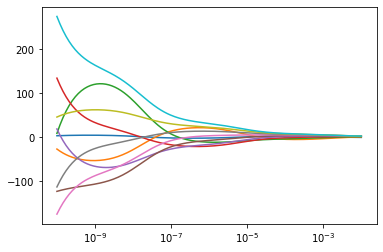

In [93]:
plt.xscale('log')
plt.plot(alphas, coefs)

(0.025118864315095794, 3.9810717055349695e-11)

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'weights')

Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

(0.025118864315095794,
 3.9810717055349695e-11,
 -198.10225966337075,
 296.5051955459473)

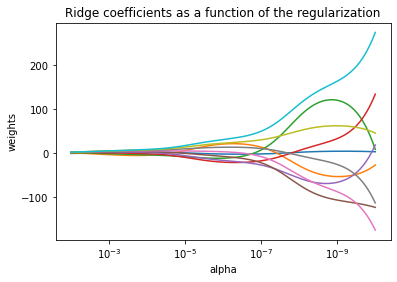

In [85]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [94]:
coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

Lasso(alpha=1e-10, fit_intercept=False)

Lasso(alpha=1.0969857978923818e-10, fit_intercept=False)

Lasso(alpha=1.2033778407775904e-10, fit_intercept=False)

Lasso(alpha=1.3200884008314168e-10, fit_intercept=False)

Lasso(alpha=1.448118227674536e-10, fit_intercept=False)

Lasso(alpha=1.5885651294280527e-10, fit_intercept=False)

Lasso(alpha=1.742633386009647e-10, fit_intercept=False)

Lasso(alpha=1.9116440753857038e-10, fit_intercept=False)

Lasso(alpha=2.0970464013232307e-10, fit_intercept=False)

Lasso(alpha=2.3004301197729216e-10, fit_intercept=False)

Lasso(alpha=2.523539170434766e-10, fit_intercept=False)

Lasso(alpha=2.768286630392061e-10, fit_intercept=False)

Lasso(alpha=3.0367711180354607e-10, fit_intercept=False)

Lasso(alpha=3.33129478793467e-10, fit_intercept=False)

Lasso(alpha=3.654383070957262e-10, fit_intercept=False)

Lasso(alpha=4.0088063288984644e-10, fit_intercept=False)

Lasso(alpha=4.3976036093027124e-10, fit_intercept=False)

Lasso(alpha=4.824108704165374e-10, fit_intercept=False)

Lasso(alpha=5.291978735958437e-10, fit_intercept=False)

Lasso(alpha=5.805225516094908e-10, fit_intercept=False)

Lasso(alpha=6.368249944718586e-10, fit_intercept=False)

Lasso(alpha=6.985879746785234e-10, fit_intercept=False)

Lasso(alpha=7.663410868007463e-10, fit_intercept=False)

Lasso(alpha=8.406652885618317e-10, fit_intercept=False)

Lasso(alpha=9.221978823334341e-10, fit_intercept=False)

Lasso(alpha=1.011637979766207e-09, fit_intercept=False)

Lasso(alpha=1.10975249641207e-09, fit_intercept=False)

Lasso(alpha=1.2173827277396621e-09, fit_intercept=False)

Lasso(alpha=1.3354515629298974e-09, fit_intercept=False)

Lasso(alpha=1.4649713983072878e-09, fit_intercept=False)

Lasso(alpha=1.6070528182616385e-09, fit_intercept=False)

Lasso(alpha=1.7629141180959444e-09, fit_intercept=False)

Lasso(alpha=1.933891750455232e-09, fit_intercept=False)

Lasso(alpha=2.1214517849106276e-09, fit_intercept=False)

Lasso(alpha=2.327202478960412e-09, fit_intercept=False)

Lasso(alpha=2.5529080682395164e-09, fit_intercept=False)

Lasso(alpha=2.8005038941836253e-09, fit_intercept=False)

Lasso(alpha=3.072112998861759e-09, fit_intercept=False)

Lasso(alpha=3.3700643292719246e-09, fit_intercept=False)

Lasso(alpha=3.6969127071950323e-09, fit_intercept=False)

Lasso(alpha=4.055460735840828e-09, fit_intercept=False)

Lasso(alpha=4.448782831127577e-09, fit_intercept=False)

Lasso(alpha=4.8802515836544335e-09, fit_intercept=False)

Lasso(alpha=5.3535666774107186e-09, fit_intercept=False)

Lasso(alpha=5.872786613189489e-09, fit_intercept=False)

Lasso(alpha=6.4423635087213705e-09, fit_intercept=False)

Lasso(alpha=7.067181273927477e-09, fit_intercept=False)

Lasso(alpha=7.752597488629465e-09, fit_intercept=False)

Lasso(alpha=8.504489341802669e-09, fit_intercept=False)

Lasso(alpha=9.329304026284696e-09, fit_intercept=False)

Lasso(alpha=1.0234114021054527e-08, fit_intercept=False)

Lasso(alpha=1.1226677735108136e-08, fit_intercept=False)

Lasso(alpha=1.2315506032928261e-08, fit_intercept=False)

Lasso(alpha=1.3509935211980251e-08, fit_intercept=False)

Lasso(alpha=1.4820207057988601e-08, fit_intercept=False)

Lasso(alpha=1.6257556664437936e-08, fit_intercept=False)

Lasso(alpha=1.7834308769319092e-08, fit_intercept=False)

Lasso(alpha=1.9563983435170648e-08, fit_intercept=False)

Lasso(alpha=2.1461411978584014e-08, fit_intercept=False)

Lasso(alpha=2.3542864143224203e-08, fit_intercept=False)

Lasso(alpha=2.5826187606826747e-08, fit_intercept=False)

Lasso(alpha=2.8330961018393243e-08, fit_intercept=False)

Lasso(alpha=3.107866187782014e-08, fit_intercept=False)

Lasso(alpha=3.4092850697468076e-08, fit_intercept=False)

Lasso(alpha=3.7399373024788015e-08, fit_intercept=False)

Lasso(alpha=4.1026581058271906e-08, fit_intercept=False)

Lasso(alpha=4.5005576757004975e-08, fit_intercept=False)

Lasso(alpha=4.9370478528390036e-08, fit_intercept=False)

Lasso(alpha=5.415871378079465e-08, fit_intercept=False)

Lasso(alpha=5.94113398496504e-08, fit_intercept=False)

Lasso(alpha=6.51733960488242e-08, fit_intercept=False)

Lasso(alpha=7.149428986597577e-08, fit_intercept=False)

Lasso(alpha=7.842822061337681e-08, fit_intercept=False)

Lasso(alpha=8.603464416684492e-08, fit_intercept=False)

Lasso(alpha=9.437878277775391e-08, fit_intercept=False)

Lasso(alpha=1.0353218432956616e-07, fit_intercept=False)

Lasso(alpha=1.1357333583431052e-07, fit_intercept=False)

Lasso(alpha=1.2458833642950082e-07, fit_intercept=False)

Lasso(alpha=1.3667163564620074e-07, fit_intercept=False)

Lasso(alpha=1.499268432786047e-07, fit_intercept=False)

Lasso(alpha=1.6446761779946628e-07, fit_intercept=False)

Lasso(alpha=1.804186409392072e-07, fit_intercept=False)

Lasso(alpha=1.9791668678535572e-07, fit_intercept=False)

Lasso(alpha=2.1711179456945052e-07, fit_intercept=False)

Lasso(alpha=2.3816855519761606e-07, fit_intercept=False)

Lasso(alpha=2.6126752255633264e-07, fit_intercept=False)

Lasso(alpha=2.8660676169482504e-07, fit_intercept=False)

Lasso(alpha=3.1440354715915e-07, fit_intercept=False)

Lasso(alpha=3.44896226040576e-07, fit_intercept=False)

Lasso(alpha=3.783462617131933e-07, fit_intercept=False)

Lasso(alpha=4.1504047578504725e-07, fit_intercept=False)

Lasso(alpha=4.5529350748669477e-07, fit_intercept=False)

Lasso(alpha=4.99450511585514e-07, fit_intercept=False)

Lasso(alpha=5.478901179593945e-07, fit_intercept=False)

Lasso(alpha=6.010276782070388e-07, fit_intercept=False)

Lasso(alpha=6.593188271333542e-07, fit_intercept=False)

Lasso(alpha=7.232633896483533e-07, fit_intercept=False)

Lasso(alpha=7.934096665797492e-07, fit_intercept=False)

Lasso(alpha=8.703591361485166e-07, fit_intercept=False)

Lasso(alpha=9.547716114208066e-07, fit_intercept=False)

Lasso(alpha=1.0473708979594487e-06, fit_intercept=False)

Lasso(alpha=1.1489510001873085e-06, fit_intercept=False)

Lasso(alpha=1.2603829296797275e-06, fit_intercept=False)

Lasso(alpha=1.3826221737646564e-06, fit_intercept=False)

Lasso(alpha=1.5167168884709241e-06, fit_intercept=False)

Lasso(alpha=1.6638168860761274e-06, fit_intercept=False)

Lasso(alpha=1.8251834943190425e-06, fit_intercept=False)

Lasso(alpha=2.0022003718155846e-06, fit_intercept=False)

Lasso(alpha=2.196385372416547e-06, fit_intercept=False)

Lasso(alpha=2.409403560239527e-06, fit_intercept=False)

Lasso(alpha=2.6430814869741083e-06, fit_intercept=False)

Lasso(alpha=2.899422853882875e-06, fit_intercept=False)

Lasso(alpha=3.1806256927941193e-06, fit_intercept=False)

Lasso(alpha=3.489101213406774e-06, fit_intercept=False)

Lasso(alpha=3.827494478516315e-06, fit_intercept=False)

Lasso(alpha=4.198707084443915e-06, fit_intercept=False)

Lasso(alpha=4.6059220411451036e-06, fit_intercept=False)

Lasso(alpha=5.05263106533568e-06, fit_intercept=False)

Lasso(alpha=5.542664520663107e-06, fit_intercept=False)

Lasso(alpha=6.080224261649427e-06, fit_intercept=False)

Lasso(alpha=6.669919663030128e-06, fit_intercept=False)

Lasso(alpha=7.316807143427192e-06, fit_intercept=False)

Lasso(alpha=8.026433522257175e-06, fit_intercept=False)

Lasso(alpha=8.804883581643465e-06, fit_intercept=False)

Lasso(alpha=9.658832241158709e-06, fit_intercept=False)

Lasso(alpha=1.059560179277617e-05, fit_intercept=False)

Lasso(alpha=1.1623224686798518e-05, fit_intercept=False)

Lasso(alpha=1.2750512407130129e-05, fit_intercept=False)

Lasso(alpha=1.3987131026472387e-05, fit_intercept=False)

Lasso(alpha=1.5343684089300132e-05, fit_intercept=False)

Lasso(alpha=1.6831803533309584e-05, fit_intercept=False)

Lasso(alpha=1.8464249428955424e-05, fit_intercept=False)

Lasso(alpha=2.0255019392306664e-05, fit_intercept=False)

Lasso(alpha=2.2219468609395237e-05, fit_intercept=False)

Lasso(alpha=2.4374441501222216e-05, fit_intercept=False)

Lasso(alpha=2.6738416158399493e-05, fit_intercept=False)

Lasso(alpha=2.9331662783900422e-05, fit_intercept=False)

Lasso(alpha=3.217641750250736e-05, fit_intercept=False)

Lasso(alpha=3.52970730273065e-05, fit_intercept=False)

Lasso(alpha=3.872038781812557e-05, fit_intercept=False)

Lasso(alpha=4.2475715525369026e-05, fit_intercept=False)

Lasso(alpha=4.6595256686646775e-05, fit_intercept=False)

Lasso(alpha=5.111433483440165e-05, fit_intercept=False)

Lasso(alpha=5.607169938205458e-05, fit_intercept=False)

Lasso(alpha=6.150985788580505e-05, fit_intercept=False)

Lasso(alpha=6.7475440531107e-05, fit_intercept=False)

Lasso(alpha=7.401959996915637e-05, fit_intercept=False)

Lasso(alpha=8.11984499318401e-05, fit_intercept=False)

Lasso(alpha=8.90735463861044e-05, fit_intercept=False)

Lasso(alpha=9.771241535346502e-05, fit_intercept=False)

Lasso(alpha=0.00010718913192051286, fit_intercept=False)

Lasso(alpha=0.00011758495540521582, fit_intercept=False)

Lasso(alpha=0.0001289890261253308, fit_intercept=False)

Lasso(alpha=0.00014149912974345758, fit_intercept=False)

Lasso(alpha=0.0001552225357427048, fit_intercept=False)

Lasso(alpha=0.00017027691722259014, fit_intercept=False)

Lasso(alpha=0.00018679135990207847, fit_intercept=False)

Lasso(alpha=0.0002049074689815846, fit_intercept=False)

Lasso(alpha=0.00022478058335487252, fit_intercept=False)

Lasso(alpha=0.0002465811075822604, fit_intercept=False)

Lasso(alpha=0.0002704959730463137, fit_intercept=False)

Lasso(alpha=0.0002967302408188873, fit_intercept=False)

Lasso(alpha=0.00032550885998350565, fit_intercept=False)

Lasso(alpha=0.00035707859649004625, fit_intercept=False)

Lasso(alpha=0.00039171014908092607, fit_intercept=False)

Lasso(alpha=0.0004297004704320844, fit_intercept=False)

Lasso(alpha=0.00047137531341167287, fit_intercept=False)

Lasso(alpha=0.0005170920242896756, fit_intercept=False)

Lasso(alpha=0.0005672426068491978, fit_intercept=False)

Lasso(alpha=0.0006222570836730231, fit_intercept=False)

Lasso(alpha=0.0006826071834272392, fit_intercept=False)

Lasso(alpha=0.000748810385759003, fit_intercept=False)

Lasso(alpha=0.0008214343584919422, fit_intercept=False)

Lasso(alpha=0.0009011018251665018, fit_intercept=False)

Lasso(alpha=0.0009884959046625587, fit_intercept=False)

Lasso(alpha=0.0010843659686896108, fit_intercept=False)

Lasso(alpha=0.0011895340673703208, fit_intercept=False)

Lasso(alpha=0.0013049019780144017, fit_intercept=False)

Lasso(alpha=0.0014314589375234786, fit_intercept=False)

Lasso(alpha=0.0015702901247293774, fit_intercept=False)

Lasso(alpha=0.0017225859653987874, fit_intercept=False)

Lasso(alpha=0.0018896523396912115, fit_intercept=False)

Lasso(alpha=0.0020729217795953697, fit_intercept=False)

Lasso(alpha=0.0022739657523579274, fit_intercept=False)

Lasso(alpha=0.0024945081352303164, fit_intercept=False)

Lasso(alpha=0.0027364399970746718, fit_intercept=False)

Lasso(alpha=0.0030018358135755923, fit_intercept=False)

Lasso(alpha=0.0032929712550971483, fit_intercept=False)

Lasso(alpha=0.0036123426997094303, fit_intercept=False)

Lasso(alpha=0.003962688638701479, fit_intercept=False)

Lasso(alpha=0.004347013158125026, fit_intercept=False)

Lasso(alpha=0.004768611697714475, fit_intercept=False)

Lasso(alpha=0.005231099308056258, fit_intercept=False)

Lasso(alpha=0.005738441648302393, fit_intercept=False)

Lasso(alpha=0.006294988990221888, fit_intercept=False)

Lasso(alpha=0.006905513520162331, fit_intercept=False)

Lasso(alpha=0.00757525025877192, fit_intercept=False)

Lasso(alpha=0.008309941949353404, fit_intercept=False)

Lasso(alpha=0.009115888299750819, fit_intercept=False)

Lasso(alpha=0.01, fit_intercept=False)

(0.025118864315095794, 3.9810717055349695e-11)

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'weights')

Text(0.5, 1.0, 'Lasso coefficients as a function of the regularization')

(0.025118864315095794,
 3.9810717055349695e-11,
 -12.199529194798739,
 10.334024718992794)

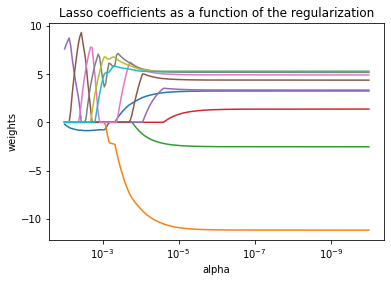

In [95]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

# 1.1.2. Ridge regression and classification

In [96]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:

        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

In [97]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True
)

2034 documents - 3.98MB (training set)
1353 documents - 2.87MB (test set)
4 categories
vectorize training done in 0.356s at 11.178MB/s
n_samples: 2034, n_features: 7831
vectorize testing done in 0.237s at 12.080MB/s
n_samples: 1353, n_features: 7831


In [100]:
np.unique(y_train)

array([0, 1, 2, 3], dtype=int64)

In [105]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
X, y = load_breast_cancer(return_X_y=True)
np.unique(y)
clf = RidgeClassifier().fit(X, y)
clf.score(X, y)

array([0, 1])

0.9595782073813708

### Multiclass 를 ridge로 classification하는 알고리즘은 leave-one-out
# 1.1.2.4. Setting the regularization parameter: leave-one-out Cross-Validation

In [109]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

reg.alpha_
reg.intercept_

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

0.01

0.05235732009927202

### CV과 비교

In [114]:
import sklearn.datasets
X, y = sklearn.datasets.load_iris(return_X_y=True)
np.unique(y)
clf = RidgeClassifier().fit(X, y)
clf.score(X, y)

array([0, 1, 2])

0.8533333333333334

In [115]:
X, y = sklearn.datasets.load_iris(return_X_y=True)
reg.fit(X, y)
reg.score(X, y)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

0.9300877432471796

In [127]:
X, y = datasets.load_diabetes(return_X_y=True)
X.shape
print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)
coefs.shape

(442, 10)

Computing regularization path using the LARS ...
.

(10, 13)

In [136]:
_, _, coefs = linear_model.lars_path(X[:, :5], y, method="lasso", verbose=True)
coefs.shape
coefs

.

(5, 6)

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,   28.40190321],
       [   0.        ,    0.        ,    0.        ,   -5.17244813,
         -52.71341946, -104.6527218 ],
       [   0.        ,  388.1925764 ,  734.20927356,  736.99036838,
         758.33291742,  779.51284294],
       [   0.        ,    0.        ,  346.01669716,  350.10546355,
         383.76772052,  411.26136256],
       [   0.        ,    0.        ,    0.        ,    0.        ,
          24.85397728,   45.13925232]])

Text(0.5, 0, '|coef| / max|coef|')

Text(0, 0.5, 'Coefficients')

Text(0.5, 1.0, 'LASSO Path')

(-0.05, 1.05, -197.49010609419489, 872.350227232777)

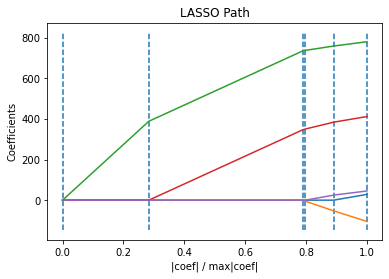

In [137]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

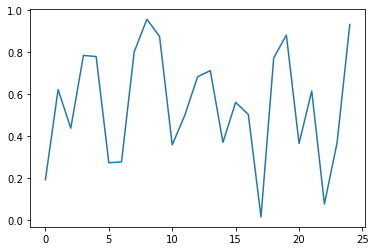

In [151]:
def func(x):
    return np.sin(2 * np.pi * x)

size = 25
rng = np.random.RandomState(1234)
x_train = rng.uniform(0.0, 1.0, size)
plt.plot(x_train)

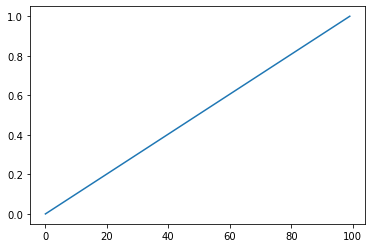

In [153]:
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0.0, 1.0, 100)
plt.plot(x_test)

In [171]:
from sklearn.linear_model import BayesianRidge

n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

In [172]:
x_train
x_train.shape
np.vander(x_train, n_order + 1)
np.vander(x_train, n_order + 1).shape
np.vander(x_train, n_order + 1, increasing=True)

array([0.19151945, 0.62210877, 0.43772774, 0.78535858, 0.77997581,
       0.27259261, 0.27646426, 0.80187218, 0.95813935, 0.87593263,
       0.35781727, 0.50099513, 0.68346294, 0.71270203, 0.37025075,
       0.56119619, 0.50308317, 0.01376845, 0.77282662, 0.88264119,
       0.36488598, 0.61539618, 0.07538124, 0.36882401, 0.9331401 ])

(25,)

array([[7.02487596e-03, 3.66796999e-02, 1.91519450e-01, 1.00000000e+00],
       [2.40768115e-01, 3.87019323e-01, 6.22108771e-01, 1.00000000e+00],
       [8.38710745e-02, 1.91605573e-01, 4.37727739e-01, 1.00000000e+00],
       [4.84399833e-01, 6.16788105e-01, 7.85358584e-01, 1.00000000e+00],
       [4.74507846e-01, 6.08362261e-01, 7.79975808e-01, 1.00000000e+00],
       [2.02554647e-02, 7.43067285e-02, 2.72592605e-01, 1.00000000e+00],
       [2.11308499e-02, 7.64324844e-02, 2.76464255e-01, 1.00000000e+00],
       [5.15603000e-01, 6.42998989e-01, 8.01872178e-01, 1.00000000e+00],
       [8.79601649e-01, 9.18031021e-01, 9.58139354e-01, 1.00000000e+00],
       [6.72066304e-01, 7.67257981e-01, 8.75932635e-01, 1.00000000e+00],
       [4.58124896e-02, 1.28033199e-01, 3.57817270e-01, 1.00000000e+00],
       [1.25747831e-01, 2.50996116e-01, 5.00995126e-01, 1.00000000e+00],
       [3.19260289e-01, 4.67121584e-01, 6.83462935e-01, 1.00000000e+00],
       [3.62012846e-01, 5.07944179e-01, 7.12702027e

(25, 4)

array([[1.00000000e+00, 1.91519450e-01, 3.66796999e-02, 7.02487596e-03],
       [1.00000000e+00, 6.22108771e-01, 3.87019323e-01, 2.40768115e-01],
       [1.00000000e+00, 4.37727739e-01, 1.91605573e-01, 8.38710745e-02],
       [1.00000000e+00, 7.85358584e-01, 6.16788105e-01, 4.84399833e-01],
       [1.00000000e+00, 7.79975808e-01, 6.08362261e-01, 4.74507846e-01],
       [1.00000000e+00, 2.72592605e-01, 7.43067285e-02, 2.02554647e-02],
       [1.00000000e+00, 2.76464255e-01, 7.64324844e-02, 2.11308499e-02],
       [1.00000000e+00, 8.01872178e-01, 6.42998989e-01, 5.15603000e-01],
       [1.00000000e+00, 9.58139354e-01, 9.18031021e-01, 8.79601649e-01],
       [1.00000000e+00, 8.75932635e-01, 7.67257981e-01, 6.72066304e-01],
       [1.00000000e+00, 3.57817270e-01, 1.28033199e-01, 4.58124896e-02],
       [1.00000000e+00, 5.00995126e-01, 2.50996116e-01, 1.25747831e-01],
       [1.00000000e+00, 6.83462935e-01, 4.67121584e-01, 3.19260289e-01],
       [1.00000000e+00, 7.12702027e-01, 5.07944179e

In [174]:
reg

BayesianRidge(alpha_init=1.0, compute_score=True, fit_intercept=False,
              lambda_init=0.001, tol=1e-06)

[1.6879536325203257, 1.0]

BayesianRidge(compute_score=True, fit_intercept=False, tol=1e-06)

(-1.3, 1.3)

Text(0.5, 1.0, '$\\alpha$_init$=1.69,\\ \\lambda$_init$=1.0$ (Default)')

Text(0.05, -1.0, '$\\alpha=4.0$\n$\\lambda=0.802$\n$L=-22.5$')

BayesianRidge(alpha_init=1.0, compute_score=True, fit_intercept=False,
              lambda_init=0.001, tol=1e-06)

BayesianRidge(alpha_init=1.0, compute_score=True, fit_intercept=False,
              lambda_init=0.001, tol=1e-06)

(-1.3, 1.3)

Text(0.5, 1.0, '$\\alpha$_init$=1.00,\\ \\lambda$_init$=0.001$')

Text(0.05, -1.0, '$\\alpha=80.8$\n$\\lambda=0.002$\n$L=-0.5$')

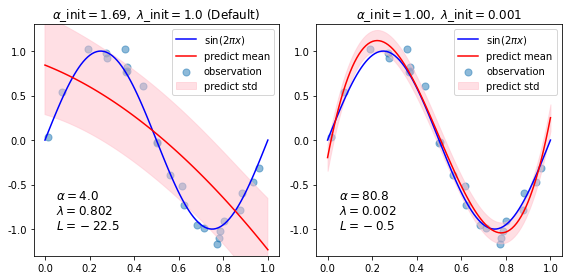

In [176]:

reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
        init
    elif i == 1:
        init = [1.0, 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
        
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(
        x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std"
    )
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        reg.alpha_, reg.lambda_, reg.scores_[-1]
    )
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

# 1.2. Linear and Quadratic Discriminant Analysism

# Timeseries

In [23]:
series = np.arange(1,11)
series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
series
time_steps = 3
len(series) - time_steps

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

7

In [28]:
X, y = [], []
for i in range(0, len(series) - time_steps):
    if len(series[i: (i+time_steps)]) == 3:
        X.append(series[i: (i+time_steps)])
        y.append(series[(i+time_steps)])

In [46]:
X = np.array(X)
X
X.shape

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

(7, 3)

In [48]:
X.reshape((X.shape[0], X.shape[1], 1))
X = X.reshape((X.shape[0], X.shape[1], 1))

array([[[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]],

       [[5],
        [6],
        [7]],

       [[6],
        [7],
        [8]],

       [[7],
        [8],
        [9]]])

In [45]:
pd.DataFrame(X)
pd.DataFrame(y)
pd.merge(pd.DataFrame(X), pd.DataFrame(y), left_index = True, right_index = True)

0  1  2
0  1  2  3
1  2  3  4
2  3  4  5
3  4  5  6
4  5  6  7
5  6  7  8
6  7  8  9

0
0   4
1   5
2   6
3   7
4   8
5   9
6  10

0_x  1  2  0_y
0    1  2  3    4
1    2  3  4    5
2    3  4  5    6
3    4  5  6    7
4    5  6  7    8
5    6  7  8    9
6    7  8  9   10

In [51]:
# example of defining a dataset
from numpy import array
# define the dataset
data = list()
n = 5000
for i in range(n):
    data.append([i+1, (i+1)*10])
data = array(data)
print(data[:5, :])
print(data.shape)
data

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]
 [ 5 50]]
(5000, 2)


array([[    1,    10],
       [    2,    20],
       [    3,    30],
       ...,
       [ 4998, 49980],
       [ 4999, 49990],
       [ 5000, 50000]])

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [2]:
import os
path = r'D:\python book\Jason Brownlee\time_series_forecasting_with_python\code\appendix_01'
os.listdir(path)
plt.rcParams["figure.figsize"] = (15,6)

['airline-passengers.csv',
 'daily-minimum-temperatures.csv',
 'daily-total-female-births.csv',
 'load_airline.py',
 'load_female_births.py',
 'load_shampoo.py',
 'load_sunspots.py',
 'load_temperatures.py',
 'shampoo-sales.csv',
 'sunspots.csv']

# ANOVA

array([[243.,   1.],
       [251.,   1.],
       [275.,   1.],
       [291.,   1.],
       [347.,   1.],
       [354.,   1.],
       [380.,   1.],
       [392.,   1.],
       [206.,   2.],
       [210.,   2.],
       [226.,   2.],
       [249.,   2.],
       [255.,   2.],
       [273.,   2.],
       [285.,   2.],
       [295.,   2.],
       [309.,   2.],
       [241.,   3.],
       [258.,   3.],
       [270.,   3.],
       [293.,   3.],
       [328.,   3.]])

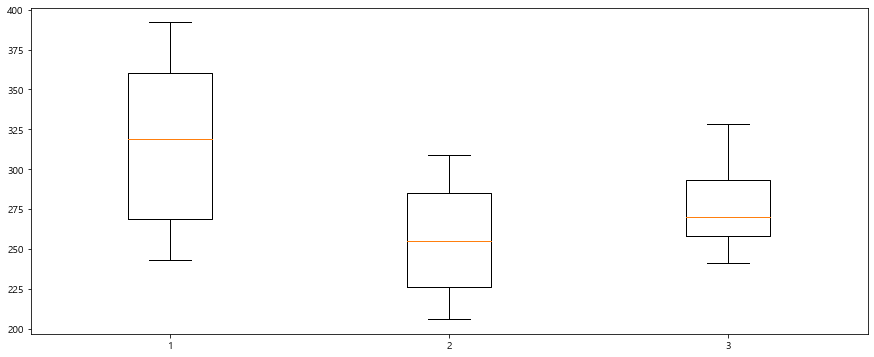

In [7]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# url로 데이터 얻어오기
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

data
# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

# matplotlib plotting
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

In [8]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3)

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Altman 910 데이터의 일원분산분석 결과 : F=3.7, p=0.04359
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


In [12]:
# 경고 메세지 무시하기
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(data, columns=['value', 'treatment'])    
df.sample(5)

value  treatment
21  328.0        3.0
0   243.0        1.0
7   392.0        1.0
5   354.0        1.0
20  293.0        3.0

In [14]:
# the "C" indicates categorical data
model = ols('value ~ C(treatment)', df).fit()

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


In [18]:
import statsmodels.api as sm
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
dat
dat.columns

dept Region    Department  Crime_pers  Crime_prop  Literacy  Donations  \
0      1      E           Ain       28870       15890        37       5098   
1      2      N         Aisne       26226        5521        51       8901   
2      3      C        Allier       26747        7925        13      10973   
3      4      E  Basses-Alpes       12935        7289        46       2733   
4      5      E  Hautes-Alpes       17488        8174        69       6962   
..   ...    ...           ...         ...         ...       ...        ...   
81    86      W        Vienne       15010        4710        25       8922   
82    87      C  Haute-Vienne       16256        6402        13      13817   
83    88      E        Vosges       18835        9044        62       4040   
84    89      C         Yonne       18006        6516        47       4276   
85   200    NaN         Corse        2199        4589        49      37015   

    Infants  Suicides MainCity  ...  Crime_parents  Infanticide  \
0     33120     35039    2:Med  ...             71           60   
1     14572     12831    2:Med  ...              4           82   
2     17044    114121    2:Med  ...             46           42   
3     23018     14238     1:Sm  ...             70           12   
4     23076     16171     1:Sm  ...             22           23   
..      ...       ...      ...  ...            ...          ...   
81    35224     21851    2:Med  ...             20            1   
82    19940     33497    2:Med  ...             68            6   
83    14978     33029    2:Med  ...             58           34   
84    16616     12789    2:Med  ...             32           22   
85    24743     37016    2:Med  ...             81            2   

    Donation_clergy  Lottery  Desertion  Instruction  Prostitutes  Distance  \
0                69       41         55           46           13   218.372   
1                36       38         82           24          327    65.945   
2                76       66         16           85           34   161.927   
3                37       80         32           29            2   351.399   
4                64       79         35            7            1   320.280   
..              ...      ...        ...          ...          ...       ...   
81               44       40         38           65           18   170.523   
82               78       55         11           84            7   198.874   
83                5       14         85           11           43   174.477   
84               35       51         66           27          272    81.797   
85               84       83          9           25            1   539.213   

    Area  Pop1831  
0   5762   346.03  
1   7369   513.00  
2   7340   298.26  
3   6925   155.90  
4   5549   129.10  
..   ...      ...  
81  6990   282.73  
82  5520   285.13  
83  5874   397.99  
84  7427   352.49  
85  8680   195.41  

[86 rows x 23 columns]

Index(['dept', 'Region', 'Department', 'Crime_pers', 'Crime_prop', 'Literacy',
       'Donations', 'Infants', 'Suicides', 'MainCity', 'Wealth', 'Commerce',
       'Clergy', 'Crime_parents', 'Infanticide', 'Donation_clergy', 'Lottery',
       'Desertion', 'Instruction', 'Prostitutes', 'Distance', 'Area',
       'Pop1831'],
      dtype='object')

In [23]:
import statsmodels.formula.api as smf
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           1.90e-08
Time:                        16:45:51   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
import pandas as pd
sat_df = pd.read_csv('https://bit.ly/PMR-ch2')
sat_df.Segment = sat_df.Segment.astype(pd.api.types.CategoricalDtype())
sat_df.head()

iProdSAT  iSalesSAT Segment  iProdREC  iSalesREC
0         6          2       1         4          3
1         4          5       3         4          4
2         5          3       4         5          4
3         3          3       2         4          4
4         3          3       3         2          2

In [24]:
from urllib.request import urlopen
import numpy as np

np.set_printoptions(precision=4, suppress=True)

import pandas as pd

pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

try:
    salary_table = pd.read_csv("salary.table")
except:  # recent pandas can read URL without urlopen
    url = "http://stats191.stanford.edu/data/salary.table"
    fh = urlopen(url)
    salary_table = pd.read_table(fh)
    #salary_table.to_csv("salary.table")

E = salary_table.E
M = salary_table.M
X = salary_table.X
S = salary_table.S

In [26]:
salary_table.head()

S  X  E  M
0  13876  1  1  1
1  11608  1  3  0
2  18701  1  3  1
3  11283  1  2  0
4  11767  1  3  0

In [32]:
plt.figure(figsize=(6, 6))
symbols = ["D", "^"]
colors = ["r", "g", "blue"]
factor_groups = salary_table.groupby(["E", "M"])
for values, group in factor_groups:
    values
    group.head(2)

<Figure size 432x432 with 0 Axes>

(1, 0)

S  X  E  M
7   10535  2  1  0
13  11417  4  1  0

(1, 1)

S  X  E  M
0   13876  1  1  1
10  14975  3  1  1

(2, 0)

S  X  E  M
3  11283  1  2  0
6  11772  2  2  0

(2, 1)

S  X  E  M
5   20872  2  2  1
11  21371  3  2  1

(3, 0)

S  X  E  M
1  11608  1  3  0
4  11767  1  3  0

(3, 1)

S  X  E  M
2   18701  1  3  1
12  19800  3  3  1

<Figure size 432x432 with 0 Axes>

In [52]:
for col in salary_table:
    col
    salary_table[col].nunique(), salary_table[col].unique()
    print('*'*100)
#salary_table.nunique()
#salary_table['E'].unique()

'S'

(46,
 array([13876, 11608, 18701, 11283, 11767, 20872, 11772, 10535, 12195,
        12313, 14975, 21371, 19800, 11417, 20263, 13231, 12884, 13245,
        13677, 15965, 12336, 21352, 13839, 22884, 16978, 14803, 17404,
        22184, 13548, 14467, 15942, 23174, 23780, 25410, 14861, 16882,
        24170, 15990, 26330, 17949, 25685, 27837, 18838, 17483, 19207,
        19346], dtype=int64))

****************************************************************************************************


'X'

(17,
 array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 20],
       dtype=int64))

****************************************************************************************************


'E'

(3, array([1, 3, 2], dtype=int64))

****************************************************************************************************


'M'

(2, array([1, 0], dtype=int64))

****************************************************************************************************


Text(0.5, 0, 'Experience')

Text(0, 0.5, 'Salary')

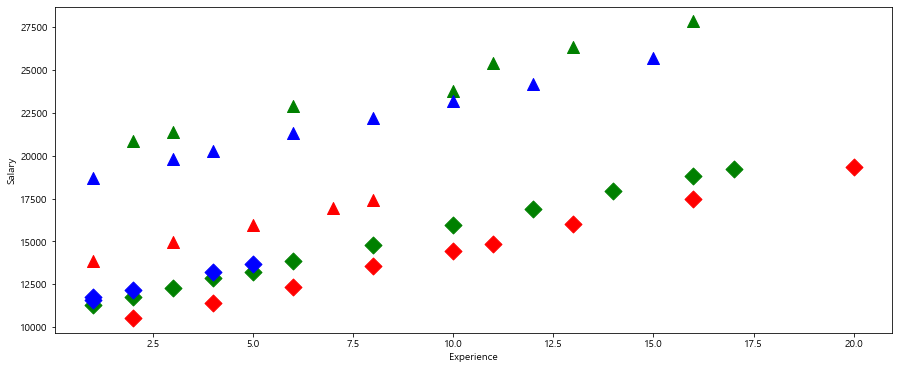

In [48]:
for values, group in factor_groups:
    i, j = values
    plt.scatter(group["X"], group["S"], marker=symbols[j], color=colors[i-1], s=144)
plt.xlabel("Experience")
plt.ylabel("Salary")

In [49]:
salary_table.head()

S  X  E  M
0  13876  1  1  1
1  11608  1  3  0
2  18701  1  3  1
3  11283  1  2  0
4  11767  1  3  0

In [50]:
formula = "S ~ C(E) + C(M) + X"
lm = ols(formula, salary_table).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           2.23e-27
Time:                        17:01:22   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.0

In [56]:
lm.model.exog[:5]
salary_table.head()

array([[1., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1.]])

S  X  E  M
0  13876  1  1  1
1  11608  1  3  0
2  18701  1  3  1
3  11283  1  2  0
4  11767  1  3  0

### Plot Interaction of Categorical Factors
In this example, we will visualize the interaction between categorical factors. First, we will create some categorical data. Then, we will plot it using the interaction_plot function, which internally re-codes the x-factor categories to integers.

In [59]:
from statsmodels.graphics.factorplots import interaction_plot
np.random.seed(12345)
weight = pd.Series(np.repeat(["low", "hi", "low", "hi"], 15), name="weight")
nutrition = pd.Series(np.repeat(["lo_carb", "hi_carb"], 30), name="nutrition")
days = np.log(np.random.randint(1, 30, size=60))

In [97]:
type(weight)
type(nutrition)
type(days)

pandas.core.series.Series

pandas.core.series.Series

numpy.ndarray

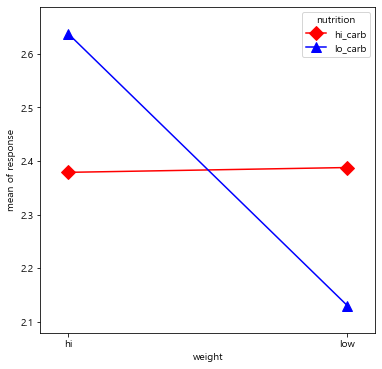

In [69]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=weight,
    trace=nutrition,
    response=days,
    colors=["red", "blue"],
    markers=["D", "^"],
    ms=10,
    ax=ax,
)

In [101]:
data = pd.DataFrame([weight, nutrition, pd.Series(days)]).T
data.columns = ['weight', 'nutrition', 'days']
data.head()

weight nutrition      days
0    low   lo_carb  1.098612
1    low   lo_carb  1.791759
2    low   lo_carb  0.693147
3    low   lo_carb  1.609438
4    low   lo_carb  2.302585

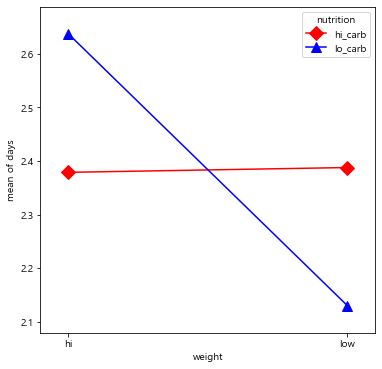

In [102]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=data['weight'],
    trace=data['nutrition'],
    response=data['days'],
    colors=["red", "blue"],
    markers=["D", "^"],
    ms=10,
    ax=ax,
)

In [84]:
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [89]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [100]:
type(tips['sex'])
type(tips['smoker'])
type(tips['total_bill'])

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

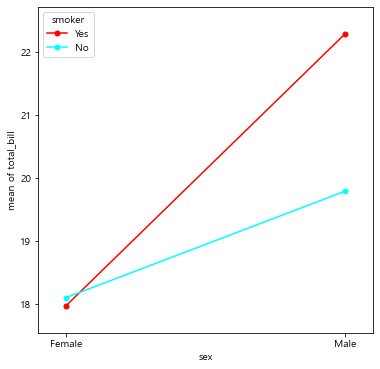

In [103]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=tips['sex'].astype('object'),
    trace=tips['smoker'],
    response=tips['total_bill'],
    #colors=["red", "blue"],
    #markers=["D", "^"],
    ms=10,
    ax=ax,
)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

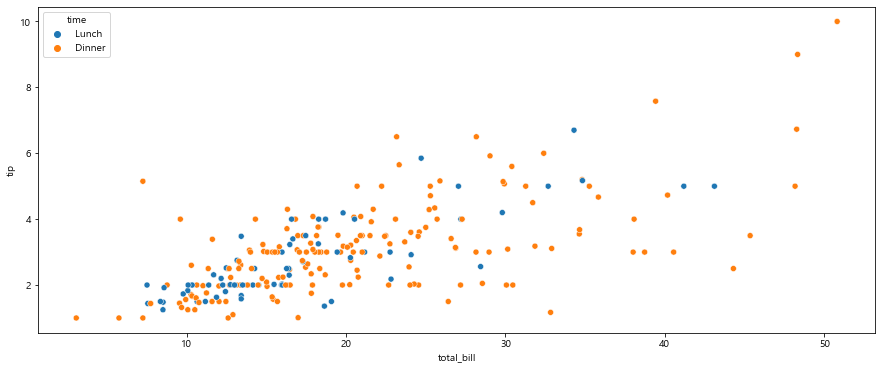

In [85]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

<AxesSubplot:xlabel='weight', ylabel='days'>

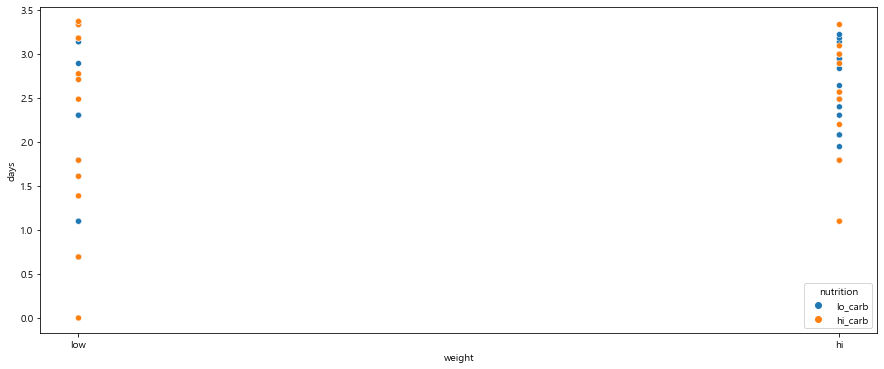

In [83]:
sns.scatterplot(data=data, x="weight", y="days", hue="nutrition")

# Chapter 24 ARIMA Model for Forecasting

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


<AxesSubplot:xlabel='Month'>

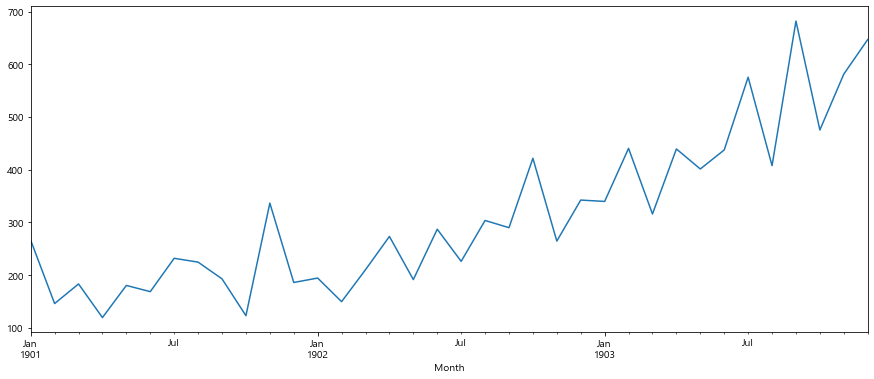

In [13]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(path + '/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

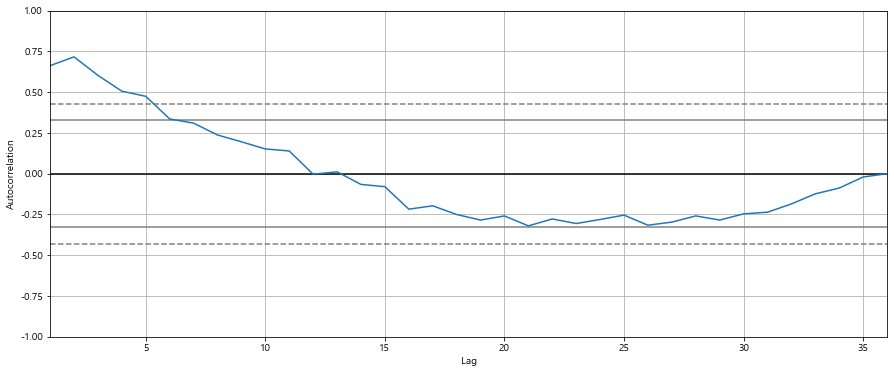

In [12]:
from pandas.plotting import autocorrelation_plot
# autocorrelation plot
autocorrelation_plot(series)
pyplot.show()

Running the example, we can see that there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags. A good starting point for the AR parameter
of the model may be 5.

'M'

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Wed, 28 Sep 2022   AIC                            408.969
Time:                        14:36:09   BIC                            418.301
Sample:                    01-01-1901   HQIC                           412.191
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

<AxesSubplot:xlabel='Month'>

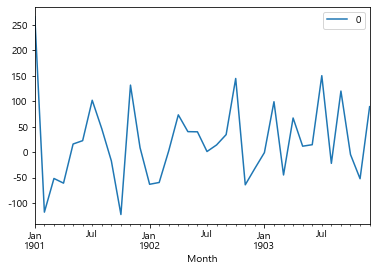

<AxesSubplot:ylabel='Density'>

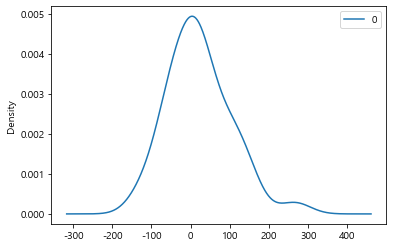

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [24]:
from statsmodels.tsa.arima.model import ARIMA
('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365673, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


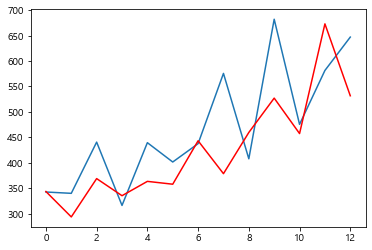

In [27]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


# Chapter 25 Autocorrelation and Partial Autocorrelation

# Chapter 23 Moving Average Models for Forecasting

predicted error=-0.748199, expected error=9.000000
predicted error=6.252326, expected error=9.000000
predicted error=4.785426, expected error=9.000000
predicted error=2.029343, expected error=9.000000
predicted error=-0.934184, expected error=9.000000
predicted error=-0.396512, expected error=9.000000
predicted error=2.156690, expected error=9.000000
predicted error=2.156690, expected error=9.000000
predicted error=0.558922, expected error=9.000000
predicted error=1.516162, expected error=9.000000
predicted error=0.301160, expected error=9.000000
predicted error=1.986629, expected error=9.000000
predicted error=1.853629, expected error=9.000000
predicted error=1.227839, expected error=9.000000
predicted error=1.155523, expected error=9.000000
predicted error=-7.543448, expected error=-10.000000
predicted error=-14.543973, expected error=-10.000000
predicted error=-21.145024, expected error=-10.000000
predicted error=-27.346209, expected error=-10.000000
predicted error=-32.680559, expe

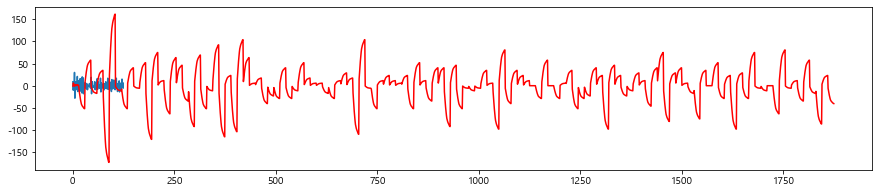

In [4]:
# forecast residual forecast error
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
series = read_csv(path + '/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]  
        predictions.append(pred_error)
        history.append(error)
        print('predicted error=%f, expected error=%f' % (pred_error, error))
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

ValueError: Found input variables with inconsistent numbers of samples: [125, 1875]

In [161]:
# calculate residual errors for a persistence forecast model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv(path + '/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# 20개로만 샘플링
#series = series[0:21]

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

Train = pd.DataFrame(np.c_[train_X, train_y], columns = ['train_X', 'train_y'])
Test = pd.DataFrame(np.c_[test_X, test_y], columns = ['test_X', 'test_y'])

# persistence model
predictions = [x for x in test_X]

Test['predictions']= predictions
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
Test['residuals'] = residuals
Test['residuals^2'] = Test['residuals']**2
rmse = np.sqrt(Test['residuals^2'].sum()/len(Test))
print(f'Test RMSE: {rmse}')

Test
residuals = DataFrame(residuals)
print(residuals.head())


Test RMSE: 9.151
Test RMSE: 9.151174787971215


test_X  test_y  predictions  residuals  residuals^2
0      42.0    51.0         42.0        9.0         81.0
1      51.0    41.0         51.0      -10.0        100.0
2      41.0    44.0         41.0        3.0          9.0
3      44.0    38.0         44.0       -6.0         36.0
4      38.0    68.0         38.0       30.0        900.0
..      ...     ...          ...        ...          ...
120    34.0    37.0         34.0        3.0          9.0
121    37.0    52.0         37.0       15.0        225.0
122    52.0    48.0         52.0       -4.0         16.0
123    48.0    55.0         48.0        7.0         49.0
124    55.0    50.0         55.0       -5.0         25.0

[125 rows x 5 columns]

      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


In [162]:
from statsmodels.tsa.ar_model import AutoReg

# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
Train['train_pred'] = train_pred
Train['train_resid'] = train_resid
Train

# model the training set residuals
window = 15
model = AutoReg(train_resid, lags=window)
model_fit = model.fit()
coef = model_fit.params
print('Coef=%s' % (model_fit.params))

train_X  train_y  train_pred  train_resid
0       35.0     32.0        35.0         -3.0
1       32.0     30.0        32.0         -2.0
2       30.0     31.0        30.0          1.0
3       31.0     44.0        31.0         13.0
4       44.0     29.0        44.0        -15.0
..       ...      ...         ...          ...
234     39.0     44.0        39.0          5.0
235     44.0     48.0        44.0          4.0
236     48.0     50.0        48.0          2.0
237     50.0     41.0        50.0         -9.0
238     41.0     42.0        41.0          1.0

[239 rows x 4 columns]

Coef=[ 0.10120699 -0.84940615 -0.77783609 -0.73345006 -0.68902061 -0.59270551
 -0.5376728  -0.42553356 -0.24861246 -0.19972102 -0.15954013 -0.11045476
 -0.14045572 -0.13299964 -0.12515801 -0.03615774]


In [163]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history
history = [history[i] for i in range(len(history))]
Train.tail(len(history))

[2.0,
 5.0,
 1.0,
 -12.0,
 11.0,
 -6.0,
 8.0,
 0.0,
 -6.0,
 -1.0,
 5.0,
 4.0,
 2.0,
 -9.0,
 1.0]

train_X  train_y  train_pred  train_resid
224     37.0     39.0        37.0          2.0
225     39.0     44.0        39.0          5.0
226     44.0     45.0        44.0          1.0
227     45.0     33.0        45.0        -12.0
228     33.0     44.0        33.0         11.0
229     44.0     38.0        44.0         -6.0
230     38.0     46.0        38.0          8.0
231     46.0     46.0        46.0          0.0
232     46.0     40.0        46.0         -6.0
233     40.0     39.0        40.0         -1.0
234     39.0     44.0        39.0          5.0
235     44.0     48.0        44.0          4.0
236     48.0     50.0        48.0          2.0
237     50.0     41.0        50.0         -9.0
238     41.0     42.0        41.0          1.0

In [164]:
predictions = list()
expected_error = list()
y_hat = list()

for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]; 
    y_hat.append(yhat.tolist())
    
    error = test_y[t] - yhat
    expected_error.append(error)
    
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)] # Train의 Train.tail(len(history))과 동일
    
Test['yhat'] = y_hat

Test

test_X  test_y  predictions  residuals  residuals^2  yhat
0      42.0    51.0         42.0        9.0         81.0  42.0
1      51.0    41.0         51.0      -10.0        100.0  51.0
2      41.0    44.0         41.0        3.0          9.0  41.0
3      44.0    38.0         44.0       -6.0         36.0  44.0
4      38.0    68.0         38.0       30.0        900.0  38.0
..      ...     ...          ...        ...          ...   ...
120    34.0    37.0         34.0        3.0          9.0  34.0
121    37.0    52.0         37.0       15.0        225.0  37.0
122    52.0    48.0         52.0       -4.0         16.0  52.0
123    48.0    55.0         48.0        7.0         49.0  48.0
124    55.0    50.0         55.0       -5.0         25.0  55.0

[125 rows x 6 columns]

## Autoregression Form
### X(t + 1) = b0 + (b1 × X(t)) + (b2 × X(t − 1))
### coef 개수는 16개 (처음 것은 intercept)
### X(16) = 

In [176]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot
series = read_csv(path + '/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
window = 15
model = AutoReg(train_resid, lags=window)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]

history
len(history)

[2.0,
 5.0,
 1.0,
 -12.0,
 11.0,
 -6.0,
 8.0,
 0.0,
 -6.0,
 -1.0,
 5.0,
 4.0,
 2.0,
 -9.0,
 1.0]

15

[-5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0]

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]

[-10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0]

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

[-6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0]

[30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0]

[-28.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0]

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]

[-7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[-9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0]

[21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0]

[-13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0]

[-2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0]

[11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0]

[-11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0]

[-8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0]

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]

[16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0]

[-12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0]

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

[-16.0,
 -16.0,
 -16.0,
 -16.0,
 -16.0,
 -16.0,
 -16.0,
 -16.0,
 -16.0,
 -16.0,
 -16.0,
 -16.0,
 -16.0,
 -16.0,
 -16.0]

[20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0]

[-4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0]

[18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0]

[-18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0]

[-11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0]

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

[-3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0]

[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

[-7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0]

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

[-9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0]

[-3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0]

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

[-2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0]

[-5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0]

[-3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0]

[19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0]

[-18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]

[-2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0]

[-4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0]

[-2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0]

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

[-4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0]

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]

[-9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0]

[-2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0]

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]

[-7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0]

[-7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0]

[16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0]

[-8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0]

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[-6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0]

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

[17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0]

[-14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0]

[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]

[-6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0]

[-4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0]

[-2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

[-10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

[-6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0]

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]

[-7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0]

[-4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0]

[17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0]

[-8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0]

[-4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0]

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

[-5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0]

[-2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0]

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]

[-7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0]

[-13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0]

[14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0]

[-5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0]

[-7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0,
 -7.0]

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

[13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0]

[-6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[-9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0]

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

[-4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0]

[17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0]

[-5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0,
 -5.0]

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

[-13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0]

[-14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0,
 -14.0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[-2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0,
 -2.0]

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]

[-10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0]

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

[15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0]

[-4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0,
 -4.0]

[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]

1875

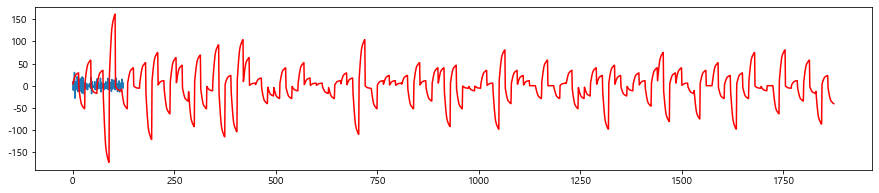

In [181]:
predictions = list()
expected_error = list()

for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    lag
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
        predictions.append(pred_error)
        history.append(error)
        #print('predicted error=%f, expected error=%f' % (pred_error, error))

len(predictions)        
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions , color='red')
pyplot.show()

In [172]:
len(expected_error)
len(history)
len(test_X)

125

1890

125

In [157]:
print('coef 개수:', len(coef))
coef # Train데이터에서 학습한 window =15 (lag)
pred_error = coef[0]
print('Train의 마지막 15개 error')
np.array(lag)
for d in range(window):
    coef[d+1], lag[window-d-1]
    pred_error += coef[d+1] * lag[window-d-1]

print('Train의 마지막 15개 prediction error')
pred_error

coef 개수: 16


array([ 0.10120699, -0.84940615, -0.77783609, -0.73345006, -0.68902061,
       -0.59270551, -0.5376728 , -0.42553356, -0.24861246, -0.19972102,
       -0.15954013, -0.11045476, -0.14045572, -0.13299964, -0.12515801,
       -0.03615774])

Train의 마지막 15개 error


array([  2.,   5.,   1., -12.,  11.,  -6.,   8.,   0.,  -6.,  -1.,   5.,
         4.,   2.,  -9.,   1.])

(-0.8494061537800461, 1.0)

(-0.777836088138751, -9.0)

(-0.7334500572482252, 2.0)

(-0.6890206138792558, 4.0)

(-0.5927055059380287, 5.0)

(-0.5376728015574765, -1.0)

(-0.42553355761855893, -6.0)

(-0.2486124569043637, 0.0)

(-0.19972101537710973, 8.0)

(-0.15954012651273541, -6.0)

(-0.11045476233201955, 11.0)

(-0.14045572362336942, -12.0)

(-0.13299964182001697, 1.0)

(-0.12515800854658543, 5.0)

(-0.036157740278770945, 2.0)

Train의 마지막 15개 prediction error


1.1555234505436345

In [136]:
Test

test_X  test_y  predictions  residuals  residuals^2  55.0
0      42.0    51.0         42.0        9.0         81.0  42.0
1      51.0    41.0         51.0      -10.0        100.0  51.0
2      41.0    44.0         41.0        3.0          9.0  41.0
3      44.0    38.0         44.0       -6.0         36.0  44.0
4      38.0    68.0         38.0       30.0        900.0  38.0
..      ...     ...          ...        ...          ...   ...
120    34.0    37.0         34.0        3.0          9.0  34.0
121    37.0    52.0         37.0       15.0        225.0  37.0
122    52.0    48.0         52.0       -4.0         16.0  52.0
123    48.0    55.0         48.0        7.0         49.0  48.0
124    55.0    50.0         55.0       -5.0         25.0  55.0

[125 rows x 6 columns]

In [27]:
expected_error

[9.0,
 -10.0,
 3.0,
 -6.0,
 30.0,
 -28.0,
 2.0,
 9.0,
 -7.0,
 1.0,
 -9.0,
 21.0,
 -13.0,
 -2.0,
 11.0,
 -11.0,
 -8.0,
 6.0,
 16.0,
 -12.0,
 9.0,
 2.0,
 -16.0,
 20.0,
 -4.0,
 18.0,
 -18.0,
 -11.0,
 -1.0,
 -3.0,
 7.0,
 4.0,
 5.0,
 -7.0,
 5.0,
 2.0,
 -9.0,
 -3.0,
 -1.0,
 -1.0,
 3.0,
 5.0,
 -2.0,
 -5.0,
 -3.0,
 19.0,
 -18.0,
 1.0,
 9.0,
 -2.0,
 -4.0,
 -2.0,
 -1.0,
 -4.0,
 9.0,
 -9.0,
 -2.0,
 6.0,
 -7.0,
 -7.0,
 16.0,
 -8.0,
 9.0,
 1.0,
 2.0,
 1.0,
 -6.0,
 -1.0,
 17.0,
 -14.0,
 7.0,
 -6.0,
 -4.0,
 -2.0,
 0.0,
 5.0,
 -10.0,
 0.0,
 5.0,
 -1.0,
 -6.0,
 9.0,
 5.0,
 4.0,
 -7.0,
 -4.0,
 17.0,
 -8.0,
 -4.0,
 4.0,
 2.0,
 -5.0,
 -2.0,
 8.0,
 -7.0,
 -13.0,
 14.0,
 -5.0,
 -7.0,
 -1.0,
 3.0,
 13.0,
 -6.0,
 0.0,
 -9.0,
 5.0,
 -4.0,
 17.0,
 -5.0,
 5.0,
 -13.0,
 1.0,
 2.0,
 0.0,
 11.0,
 -14.0,
 1.0,
 -2.0,
 6.0,
 -10.0,
 3.0,
 15.0,
 -4.0,
 7.0,
 -5.0]

# Chapter 22 Autoregression Models for Forecasting

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

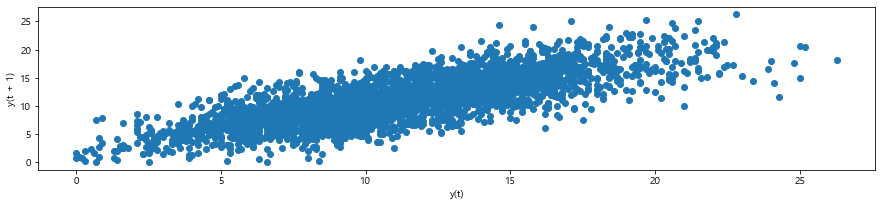

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

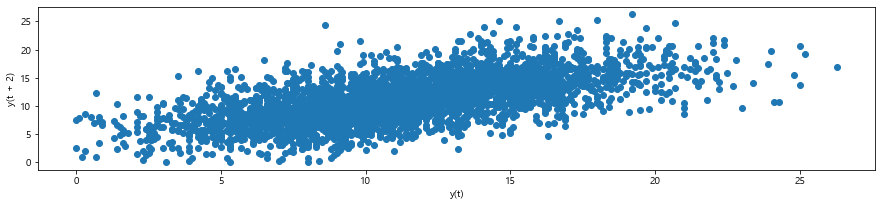

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

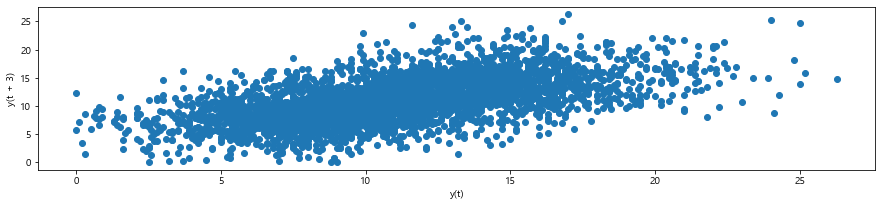

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 4)'>

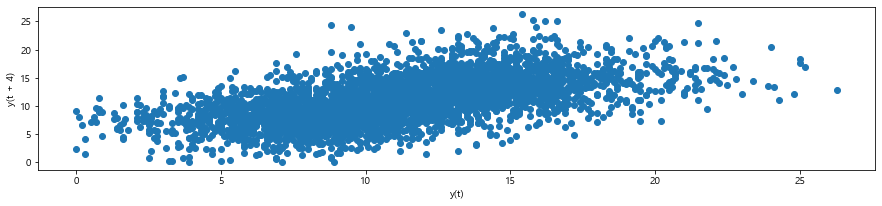

In [80]:
series = pd.read_csv(path + '/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
for lag in range(1, 5):
    pd.plotting.lag_plot(series, lag=lag); plt.show()

In [81]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


In [82]:
for t in range(1, 200):
    col = 't+' + str(t)
    dataframe[col] = dataframe['t'].shift(t)

t       t+1       t+2       t+3       t+4      t+5       t+6       t+7  \
t  1.0  0.774886  0.631095  0.586346  0.578866  0.57854  0.576526  0.575987   

        t+8       t+9  ...     t+190    t+191     t+192     t+193     t+194  \
t  0.569525  0.563448  ... -0.520096 -0.52252 -0.520218 -0.518063 -0.514743   

      t+195     t+196     t+197     t+198     t+199  
t -0.504293 -0.504491 -0.515748 -0.517543 -0.501799  

[1 rows x 200 columns]

<AxesSubplot:>

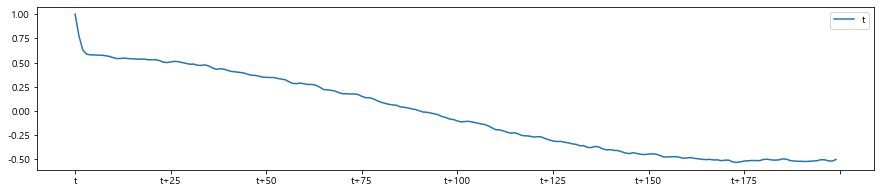

In [83]:
dataframe.corr().head(1)
dataframe.corr().head(1).T.plot()

## Autocorrelation과 correlation은 다른 것임

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

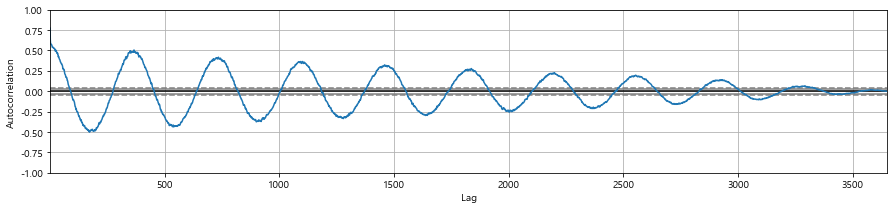

In [84]:
pd.plotting.autocorrelation_plot(series)

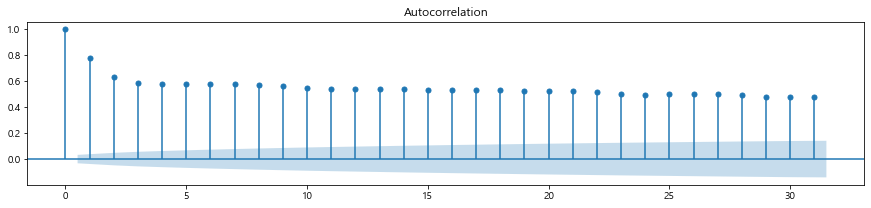

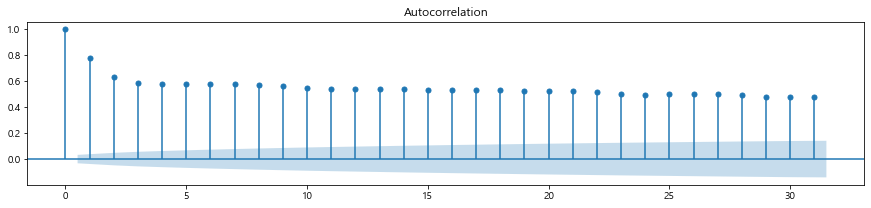

In [85]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=31)

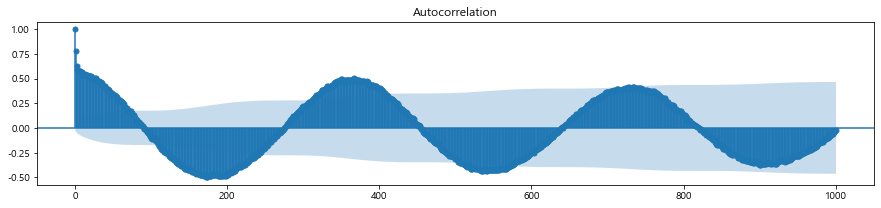

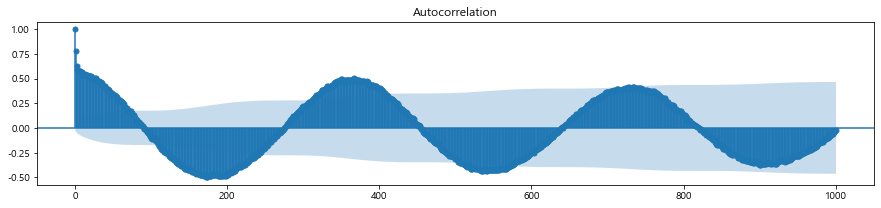

In [86]:
plot_acf(series, lags=1000)

Test RMSE: 1.850


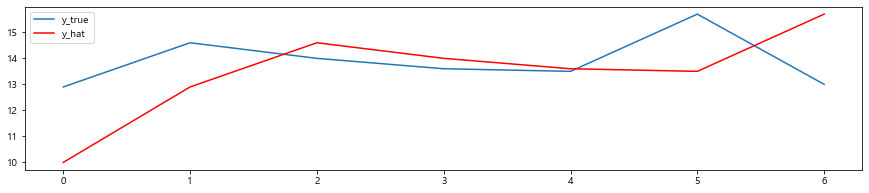

In [87]:
from sklearn.metrics import mean_squared_error

values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
    return x
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
plt.plot(test_y, label='y_true')
plt.plot(predictions, color='red', label='y_hat')
plt.legend()
plt.show()

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


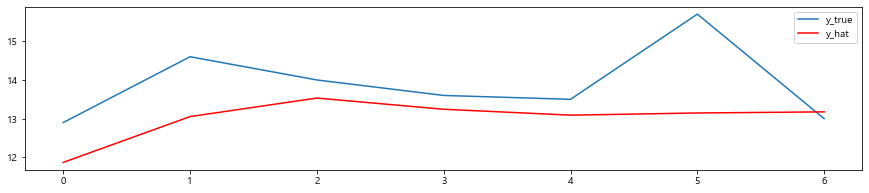

In [88]:
from statsmodels.tsa.ar_model import AutoReg

X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot predictions vs expected
plt.plot(test_y, label='y_true')
plt.plot(predictions, color='red', label='y_hat')
plt.legend()
plt.show()

## KMEANS

(427, 640, 3)
(427, 640, 3)


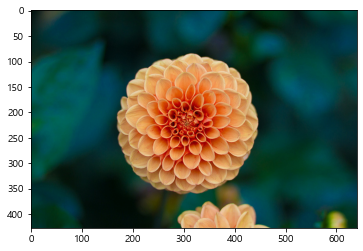

In [2]:
from sklearn.utils import shuffle

from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
flower = load_sample_image('flower.jpg')
print(flower.shape)
flower = np.array(flower, dtype=np.float64) / 255
print(flower.shape)
plt.imshow(flower);

(427, 640)

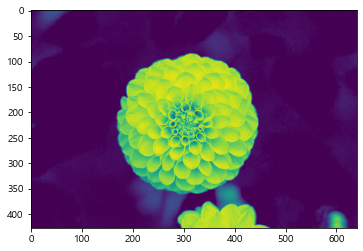

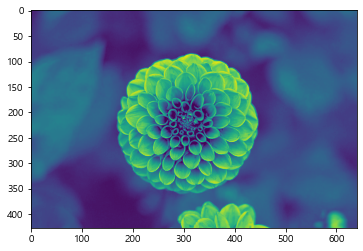

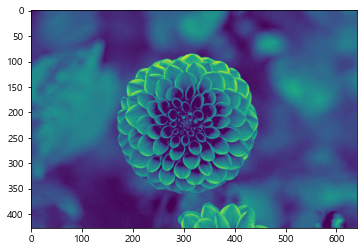

In [3]:
flower[:, :, 0].shape
plt.imshow(flower[:, :, 0])
plt.show()
plt.imshow(flower[:, :, 1])
plt.show()
plt.imshow(flower[:, :, 2])
plt.show()

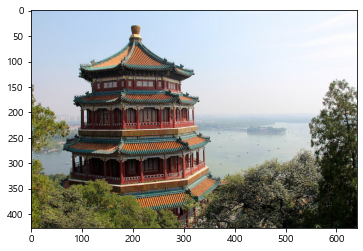

In [4]:
plt.imshow(load_sample_image('china.jpg'))

In [5]:
w, h, d = original_shape = tuple(flower.shape)
w, h, d
assert d == 3
image_array = np.reshape(flower, (w * h, d))

(427, 640, 3)

In [6]:
image_array.shape
flower.shape

(273280, 3)

(427, 640, 3)

<AxesSubplot:>

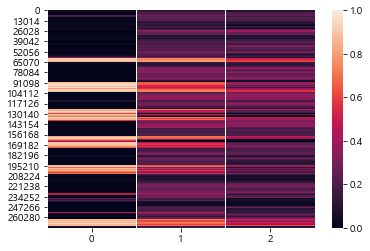

In [7]:
sns.heatmap(image_array)

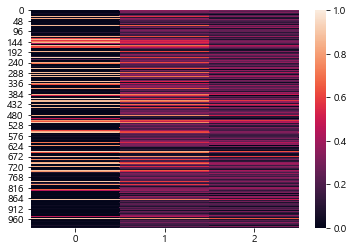

In [8]:
image_sample = shuffle(image_array, random_state=42)[:1000]
sns.heatmap(image_sample);

In [9]:
pd.DataFrame(image_sample)

0         1         2
0    0.043137  0.211765  0.176471
1    0.000000  0.215686  0.243137
2    0.000000  0.345098  0.298039
3    0.050980  0.117647  0.086275
4    0.870588  0.552941  0.294118
..        ...       ...       ...
995  0.003922  0.196078  0.254902
996  0.000000  0.262745  0.325490
997  0.003922  0.196078  0.250980
998  0.000000  0.329412  0.309804
999  0.031373  0.105882  0.090196

[1000 rows x 3 columns]

In [10]:
pd.DataFrame(image_sample).isnull().sum()

0    0
1    0
2    0
dtype: int64

In [11]:
image_sample = shuffle(image_array, random_state=42)[:1000]
image_sample.shape
pd.DataFrame(image_sample).isnull().sum()
image_sample.mean(0)
type(image_sample)

(1000, 3)

0    0
1    0
2    0
dtype: int64

array([0.20353333, 0.29098039, 0.22772157])

numpy.ndarray

In [13]:
#Fit Kmeans
n_colors = 64
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_sample)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
#Get color indices for full image
labels = kmeans.predict(image_array)

# Bayesian Regression From Scratch
## Deriving Bayesian Linear Regression from first principles using Python

https://towardsdatascience.com/bayesian-regression-from-scratch-a1fe19ff64c

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

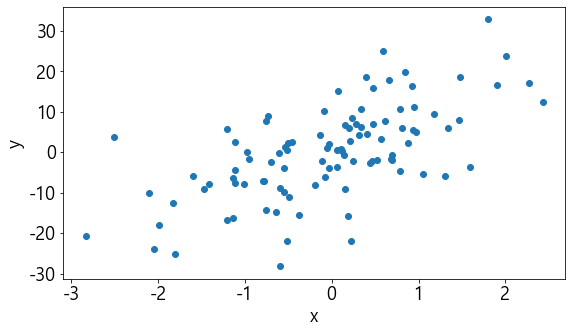

In [2]:
from sklearn import datasets
# Generate data
x, y = datasets.make_regression(n_samples=100,
                                n_features=1,
                                noise=10)
# Plot data
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(x, y)
ax.ticklabel_format(style='plain')
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

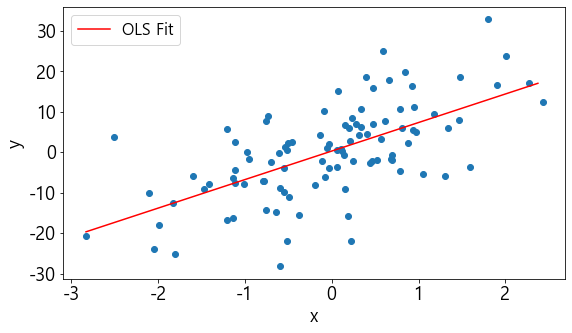

In [3]:
# Packages
import statsmodels.formula.api as smf
# Create a dataframe
data = pd.DataFrame(list(zip(x.flatten(), y)), columns =['x', 'y'])
# Calculating the slope and intercept
formula = 'y ~ x'
results = smf.ols(formula, data=data).fit()
# Get our equation of the OLS line
intercept = results.params['Intercept']
slope = results.params['x']
x_vals = np.arange(min(x), max(x), 0.1)
ols_line = slope*x_vals + intercept
# Plot the OLS line
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(data['x'], data['y'])
ax.plot(x_vals, ols_line,label='OLS Fit', color='red')
ax.ticklabel_format(style='plain')
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.show()

In [4]:
def make_uninformative_prior(name,data):
    """Function to make priors."""
    df = pd.DataFrame({name:data})
    df['Probability'] = 1/len(data)
    return df

In [8]:
results.params

Intercept    0.278348
x            7.061883
dtype: float64

In [9]:
# Create a range of values for the slope
data_slope = np.linspace(results.params['x']*0.8,
                         results.params['x']*1.2, num=60)
data_slope

array([5.6495065 , 5.69738368, 5.74526085, 5.79313803, 5.8410152 ,
       5.88889237, 5.93676955, 5.98464672, 6.03252389, 6.08040107,
       6.12827824, 6.17615542, 6.22403259, 6.27190976, 6.31978694,
       6.36766411, 6.41554128, 6.46341846, 6.51129563, 6.55917281,
       6.60704998, 6.65492715, 6.70280433, 6.7506815 , 6.79855867,
       6.84643585, 6.89431302, 6.9421902 , 6.99006737, 7.03794454,
       7.08582172, 7.13369889, 7.18157606, 7.22945324, 7.27733041,
       7.32520759, 7.37308476, 7.42096193, 7.46883911, 7.51671628,
       7.56459345, 7.61247063, 7.6603478 , 7.70822498, 7.75610215,
       7.80397932, 7.8518565 , 7.89973367, 7.94761084, 7.99548802,
       8.04336519, 8.09124237, 8.13911954, 8.18699671, 8.23487389,
       8.28275106, 8.33062823, 8.37850541, 8.42638258, 8.47425976])

In [11]:
prior_slope = make_uninformative_prior('slope',data_slope)
prior_slope.head()
prior_slope.tail()

slope  Probability
0  5.649507     0.016667
1  5.697384     0.016667
2  5.745261     0.016667
3  5.793138     0.016667
4  5.841015     0.016667

slope  Probability
55  8.282751     0.016667
56  8.330628     0.016667
57  8.378505     0.016667
58  8.426383     0.016667
59  8.474260     0.016667

<AxesSubplot:>

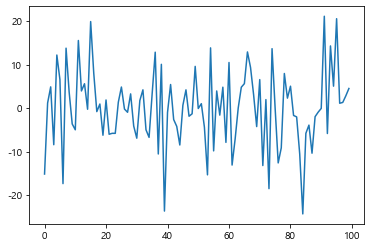

<AxesSubplot:>

8.867553361127557

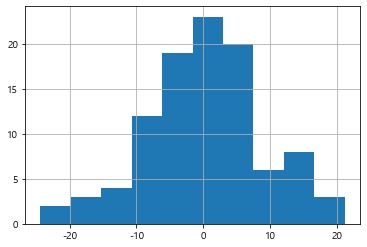

In [18]:
results.resid.plot(); plt.show()
results.resid.hist()
results.resid.std()

In [19]:
# Create a range of values for the intercept
data_inter = np.linspace(results.params['Intercept']*0.8,
                         results.params['Intercept']*1.2, num=60)
prior_inter = make_uninformative_prior('intercept',data_inter)
prior_inter.head()
# Create a range of values for the sigma
data_sigma = np.linspace(results.resid.std()*0.8,
                         results.resid.std()*1.2, num=60)
prior_sigma = make_uninformative_prior('sigma',data_sigma)
prior_sigma.head()

intercept  Probability
0   0.222678     0.016667
1   0.224565     0.016667
2   0.226452     0.016667
3   0.228340     0.016667
4   0.230227     0.016667

sigma  Probability
0  7.094043     0.016667
1  7.154162     0.016667
2  7.214281     0.016667
3  7.274400     0.016667
4  7.334519     0.016667

In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [99]:
import os
path = r'D:\python book\Jason Brownlee\time_series_forecasting_with_python\code\appendix_01'
os.listdir(path)
plt.rcParams["figure.figsize"] = (20,4)

['airline-passengers.csv',
 'daily-minimum-temperatures.csv',
 'daily-total-female-births.csv',
 'load_airline.py',
 'load_female_births.py',
 'load_shampoo.py',
 'load_sunspots.py',
 'load_temperatures.py',
 'shampoo-sales.csv',
 'sunspots.csv']

# 20220923

In [30]:
# calculate a train-test split of a time series dataset
from pandas import read_csv
series = read_csv(path + '/sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2820
Training Observations: 1861
Testing Observations: 959


<AxesSubplot:xlabel='Month'>

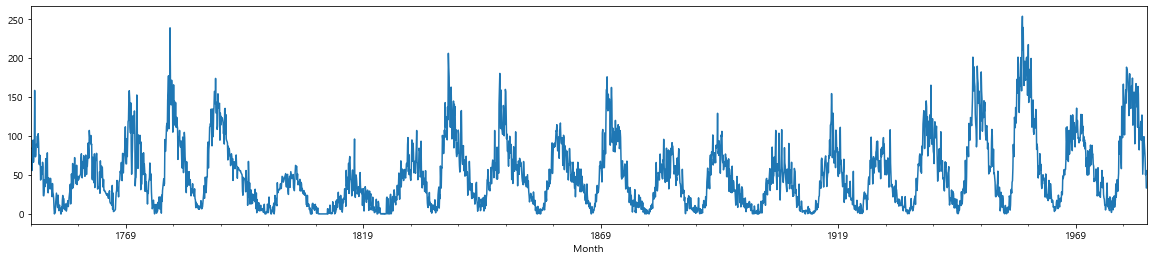

In [31]:
series.plot()

Observations: 2820
Training Observations: 1861
Testing Observations: 959


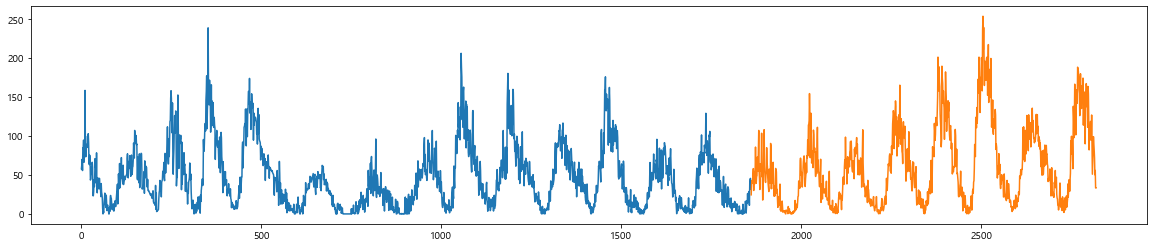

In [39]:
from matplotlib import pyplot
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

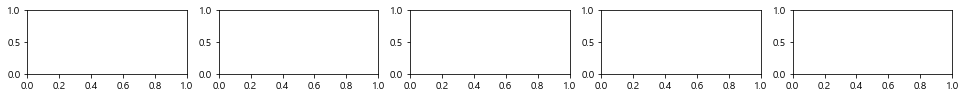

In [67]:
index = 1
for i in np.arange(0,5):
    pyplot.subplot(360 + index)
    index += 1

<Figure size 1440x288 with 0 Axes>

Observations: 1410
Training Observations: 705
Testing Observations: 705


<AxesSubplot:>

Observations: 2115
Training Observations: 1410
Testing Observations: 705


<AxesSubplot:>

Observations: 2820
Training Observations: 2115
Testing Observations: 705


<AxesSubplot:>

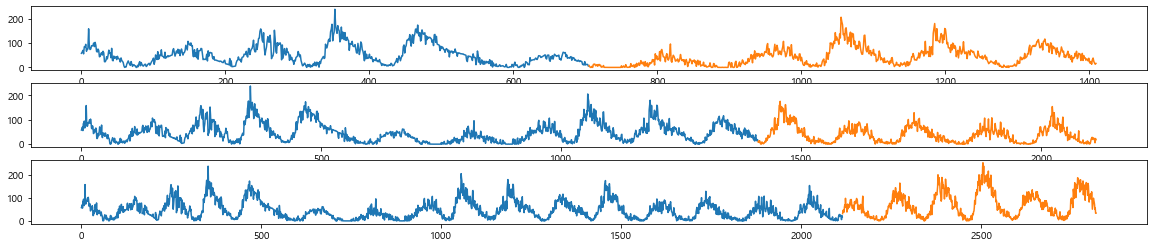

In [51]:
from sklearn.model_selection import TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure()
index = 1

for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]

    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    index += 1
pyplot.show()

In [75]:
Obs = np.arange(0,10)
splits = TimeSeriesSplit(n_splits=5)

for train_index, test_index in splits.split(Obs):
    train_index, test_index

(array([0, 1, 2, 3, 4]), array([5]))

(array([0, 1, 2, 3, 4, 5]), array([6]))

(array([0, 1, 2, 3, 4, 5, 6]), array([7]))

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([8]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([9]))

In [77]:
n_train = 7
n_records = len(Obs)
for i in range(n_train, n_records):
    train, test = Obs[0:i], Obs[i:i+1]
    (train, test)
    print('train=%d, test=%d' % (len(train), len(test)))

(array([0, 1, 2, 3, 4, 5, 6]), array([7]))

train=7, test=1


(array([0, 1, 2, 3, 4, 5, 6, 7]), array([8]))

train=8, test=1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([9]))

train=9, test=1


In [70]:
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

In [101]:
series = read_csv(path + './daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#  Create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(+1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))


      t  t+1
0   NaN   35
1  35.0   32
2  32.0   30
3  30.0   31
4  31.0   44


In [102]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [103]:
# persistence model
def model_persistence(x):
    return x

Test RMSE: 9.151


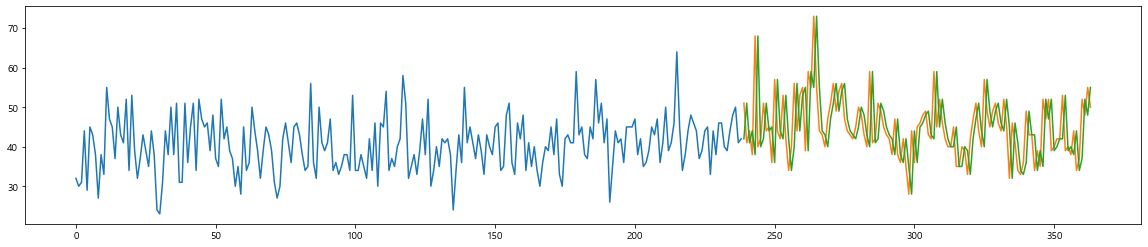

In [104]:
# walk-forward validation
from sklearn.metrics import mean_squared_error
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
    
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

0
0     9.0
1   -10.0
2     3.0
3    -6.0
4    30.0
..    ...
120   3.0
121  15.0
122  -4.0
123   7.0
124  -5.0

[125 rows x 1 columns]

<AxesSubplot:>

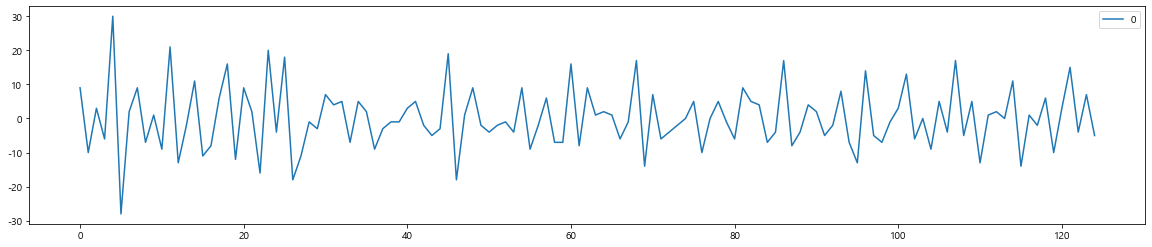

In [105]:
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
residuals
# plot residuals
residuals.plot()

In [106]:
residuals.describe()

0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

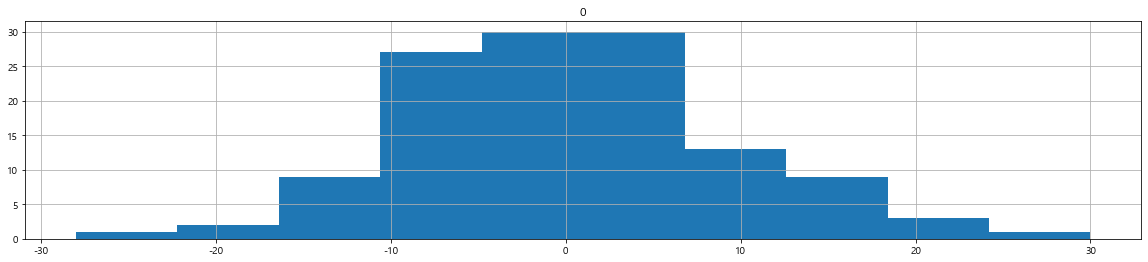

<AxesSubplot:ylabel='Density'>

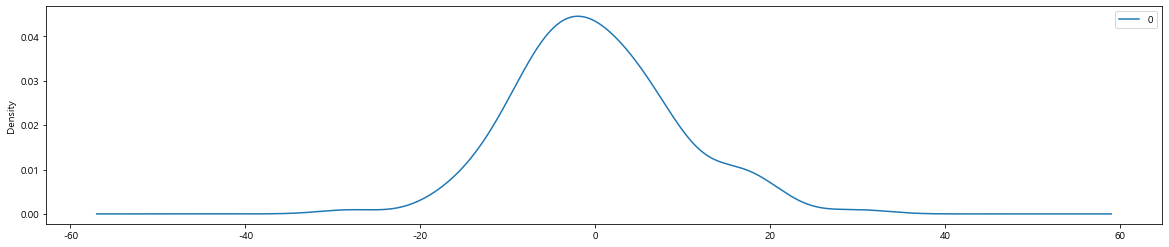

In [107]:
# histogram plot
residuals.hist()
pyplot.show()
# density plot
residuals.plot(kind='kde')
pyplot.show()

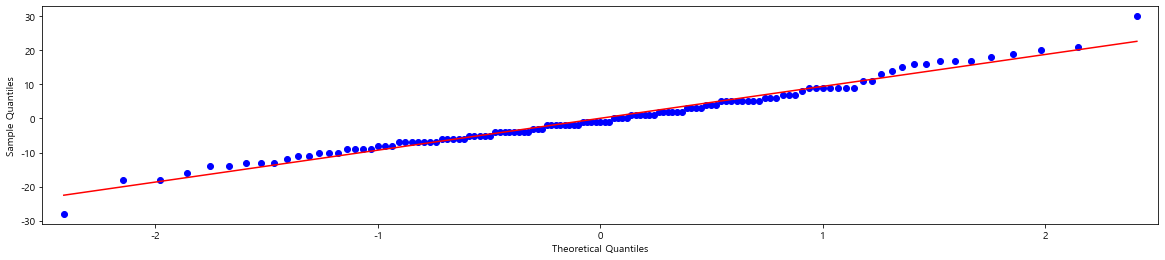

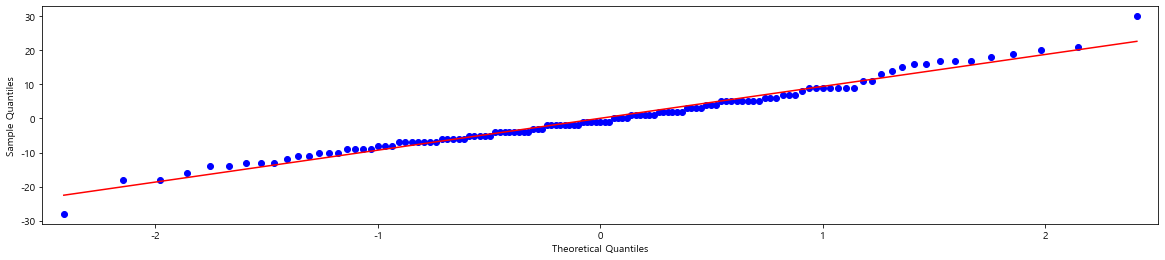

In [111]:
from statsmodels.graphics.gofplots import qqplot
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = np.array(residuals)
qqplot(residuals, line='r')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

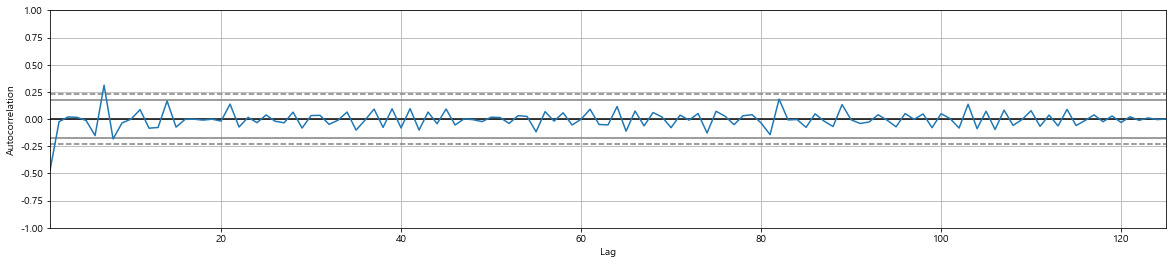

In [112]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(residuals)


In [117]:
series = pd.read_csv(path + './daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
dataframe
# round forecast to nearest 5
for i in range(len(dataframe['t+1'])):
    dataframe['t+1'][i] = int(dataframe['t+1'][i] / 5) * 5.0
print(dataframe.head(5))

t   t+1
0      NaN  20.7
1     20.7  17.9
2     17.9  18.8
3     18.8  14.6
4     14.6  15.8
...    ...   ...
3645  14.6  14.0
3646  14.0  13.6
3647  13.6  13.5
3648  13.5  15.7
3649  15.7  13.0

[3650 rows x 2 columns]

      t   t+1
0   NaN  20.0
1  20.7  15.0
2  17.9  15.0
3  18.8  10.0
4  14.6  15.0


# 20220922

In [15]:
import nltk
from konlpy.corpus import kobill

tokens_ko = ['조상', '삼성', '현대', '조상', '조상', '현대']
ko = nltk.Text(tokens_ko, name='조상')

In [16]:
# returns number of unique tokens (중복값을 뺀 토큰 수)
# set : 중복이 없는 집합함수 뽑아주는 메서드

print(len(set(ko.tokens)))

3


<Figure size 864x432 with 0 Axes>

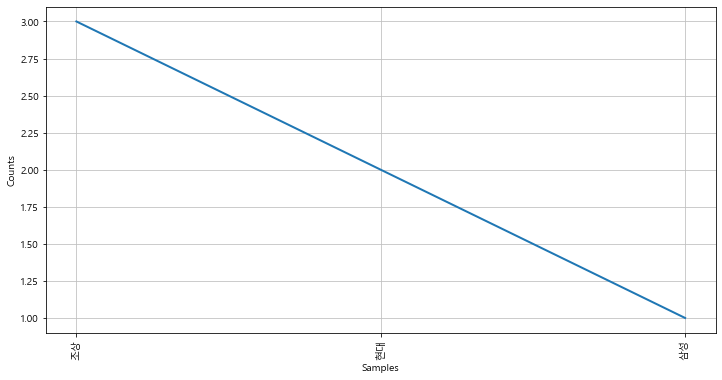

In [17]:
plt.figure(figsize=(12,6))
ko.plot()   # 상위 50개만 보여줘
plt.show()

<Figure size 864x288 with 0 Axes>

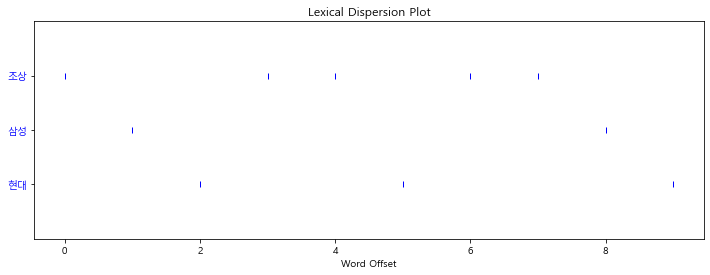

In [23]:
plt.figure(figsize=(12,4))
# dispersion_plot : 텍스트 내 단어 사용 빈도와 위치를 분산 그래프로 그려줌
ko.dispersion_plot(['조상', '삼성', '현대'])

In [21]:
tokens_ko = ['조상', '삼성', '현대', '조상', '조상', '현대', '조상', '조상', '삼성', '현대']
ko = nltk.Text(tokens_ko, name='조상')

# Classification Threshold Tuning with GridSearchCV
### 그리드서치에서 threshold가 튜닝의 대상인가?
- https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv

In [23]:
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

In [33]:
X = X[y < 2]
y = y[y < 2]
X.shape; y.shape

(100, 4)

(100,)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn import tree
model = tree.DecisionTreeClassifier()
params = [{'criterion':["gini","entropy"],"max_depth":[1,2,3,4,5,6,7,8,9,10],"class_weight":["balanced"]}]

from sklearn.model_selection import GridSearchCV
GSCV = GridSearchCV(model,params,scoring="roc_auc")
GSCV.fit(X_train,y_train)
GSCV.best_params_
best_model = GSCV.best_estimator_
best_model

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'class_weight': ['balanced'],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             scoring='roc_auc')

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1}

DecisionTreeClassifier(class_weight='balanced', max_depth=1)

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = best_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 14]], dtype=int64)

In [37]:
from sklearn.metrics import roc_curve
preds = best_model.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

1.0

### This threshold will give you the lowest false positive rate and the highest true positive rate

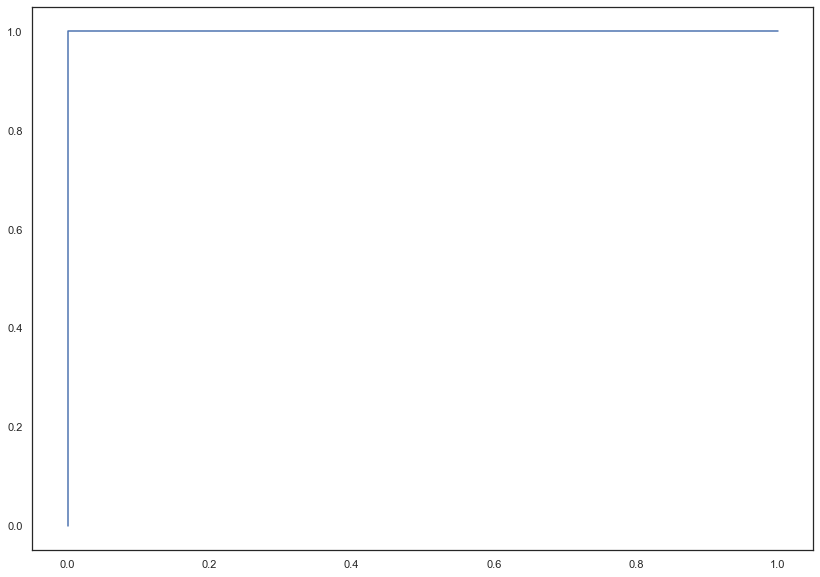

In [38]:
plt.plot(fpr, tpr)

## Grid search
- https://goodboychan.github.io/python/datacamp/machine_learning/2020/08/05/02-Grid-search.html

In [39]:
pwd

'D:\\deep learning'

In [47]:
from sklearn.model_selection import train_test_split

credit_card = pd.read_csv('./data/UCI_Credit_Card.csv')
credit_card

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

In [52]:
credit_card.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [53]:
# To change categorical variable with dummy variables
#credit_card = pd.get_dummies(credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

X = credit_card.drop(['ID', 'default.payment.next.month'], axis=1)
y = credit_card['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create the function
def gbm_grid_search(learn_rate, max_depth):
    # Create the model
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth)
    
    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Return the hyperparameters and score
    return ([learn_rate, max_depth, accuracy_score(y_test, predictions)])

In [ ]:
# Create the relevant lists
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2, 4, 6]

# Create the for loop
for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learn_rate, max_depth))

In [57]:
results_list

[[0.01, 2, 0.8182222222222222],
 [0.01, 4, 0.8177777777777778],
 [0.01, 6, 0.8183333333333334],
 [0.1, 2, 0.8197777777777778],
 [0.1, 4, 0.8181111111111111],
 [0.1, 6, 0.8171111111111111],
 [0.5, 2, 0.816],
 [0.5, 4, 0.8046666666666666],
 [0.5, 6, 0.7857777777777778]]

In [58]:
# Extend the function input
def gbm_grid_search_extended(learn_rate, max_depth, subsample):
    # Extend the model creation section
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth,
                                       subsample=subsample)
    
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Extend the return part
    return([learn_rate, max_depth, subsample, accuracy_score(y_test, predictions)])

In [59]:
# Create the new list to test
subsample_list = [0.4, 0.6]

for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        # Extend the for loop
        for subsample in subsample_list:
            # Extend the results to include the new hyperparameter
            results_list.append(gbm_grid_search_extended(learn_rate, max_depth, subsample))
            
# Print the results
results_list

[[0.01, 2, 0.8182222222222222],
 [0.01, 4, 0.8177777777777778],
 [0.01, 6, 0.8183333333333334],
 [0.1, 2, 0.8197777777777778],
 [0.1, 4, 0.8181111111111111],
 [0.1, 6, 0.8171111111111111],
 [0.5, 2, 0.816],
 [0.5, 4, 0.8046666666666666],
 [0.5, 6, 0.7857777777777778],
 [0.01, 2, 0.4, 0.8182222222222222],
 [0.01, 2, 0.6, 0.8185555555555556],
 [0.01, 4, 0.4, 0.8178888888888889],
 [0.01, 4, 0.6, 0.8173333333333334],
 [0.01, 6, 0.4, 0.8157777777777778],
 [0.01, 6, 0.6, 0.8162222222222222],
 [0.1, 2, 0.4, 0.8196666666666667],
 [0.1, 2, 0.6, 0.8192222222222222],
 [0.1, 4, 0.4, 0.818],
 [0.1, 4, 0.6, 0.8178888888888889],
 [0.1, 6, 0.4, 0.8142222222222222],
 [0.1, 6, 0.6, 0.8142222222222222],
 [0.5, 2, 0.4, 0.8116666666666666],
 [0.5, 2, 0.6, 0.8141111111111111],
 [0.5, 4, 0.4, 0.7892222222222223],
 [0.5, 4, 0.6, 0.7928888888888889],
 [0.5, 6, 0.4, 0.7811111111111111],
 [0.5, 6, 0.6, 0.7851111111111111]]

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parametergrid
param_grid = {
    'max_depth':[2, 4, 8, 15],
    'max_features':['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True,
    return_train_score=True
)

print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='roc_auc')


In [64]:
grid_rf_class.fit(X_train, y_train)

# Read the cv_results property into adataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print(cv_results_df)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ["params"]]
column

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
best_row

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='roc_auc')

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.728051      0.022149         0.026154        0.002702   
1       0.773515      0.023744         0.026928        0.002596   
2       1.292347      0.041061         0.030707        0.002231   
3       1.233718      0.008924         0.031503        0.002420   
4       2.266725      0.067396         0.043101        0.003533   
5       2.268944      0.038032         0.040667        0.001594   
6       3.733606      0.070145         0.061636        0.002040   
7       3.706278      0.052024         0.062835        0.003447   

  param_max_depth param_max_features  \
0               2               auto   
1               2               sqrt   
2               4               auto   
3               4               sqrt   
4               8               auto   
5               8               sqrt   
6              15               auto   
7              15               sqrt   

                                   

params
0   {'max_depth': 2, 'max_features': 'auto'}
1   {'max_depth': 2, 'max_features': 'sqrt'}
2   {'max_depth': 4, 'max_features': 'auto'}
3   {'max_depth': 4, 'max_features': 'sqrt'}
4   {'max_depth': 8, 'max_features': 'auto'}
5   {'max_depth': 8, 'max_features': 'sqrt'}
6  {'max_depth': 15, 'max_features': 'auto'}
7  {'max_depth': 15, 'max_features': 'sqrt'}

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5       2.268944      0.038032         0.040667        0.001594   

  param_max_depth param_max_features  \
5               8               sqrt   

                                     params  split0_test_score  \
5  {'max_depth': 8, 'max_features': 'sqrt'}           0.781242   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
5           0.775443           0.782594  ...          0.78038        0.003192   

   rank_test_score  split0_train_score  split1_train_score  \
5                1            0.830261            0.834413   

   split2_train_score  split3_train_score  split4_train_score  \
5            0.829578            0.832675            0.831876   

   mean_train_score  std_train_score  
5          0.831761         0.001726  

[1 rows x 22 columns]

In [65]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# See what type of object the best_estimator_property is
type(grid_rf_class.best_estimator_)

# Create an array of predictions directly using the best_estimator_property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
predictions[0:5]

# Now create a confusion matrix
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:, 1]
print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

sklearn.ensemble._forest.RandomForestClassifier

array([0, 1, 1, 0, 0], dtype=int64)

Confusion Matrix 
 [[6682  341]
 [1298  679]]
ROC-AUC Score 
 0.7773802833395669


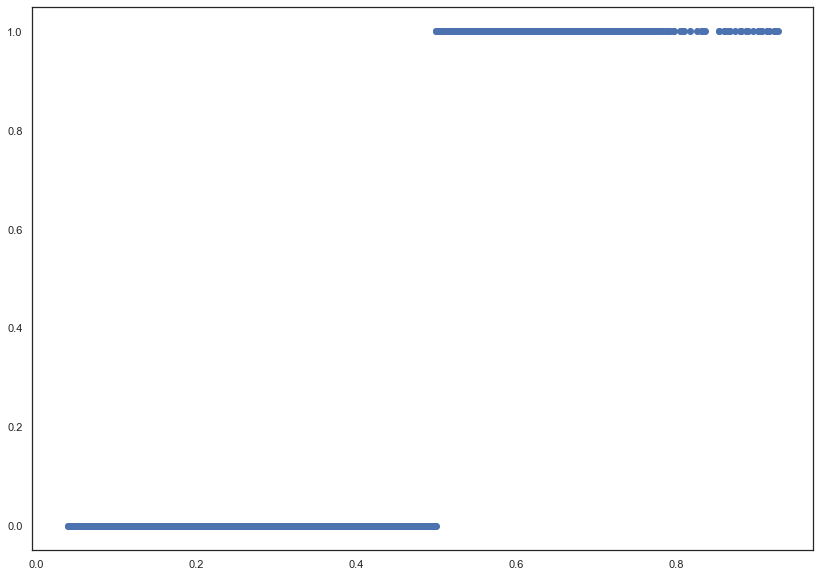

In [73]:
plt.scatter(predictions_proba, predictions)

In [ ]:
import numpy as np
>>> from sklearn.model_selection import StratifiedKFold
>>> kfold = StratifiedKFold(n_splits=10,
... random_state=1).split(X_train,
... y_train)
>>> scores = []
>>> for k, (train, test) in enumerate(kfold):
... pipe_lr.fit(X_train[train], y_train[train])
... score = pipe_lr.score(X_train[test], y_train[test])
... scores.append(score)
... print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
... np.bincount(y_train[train]), score))


# UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction
- https://umap-learn.readthedocs.io/en/latest/index.html

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [6]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins.head()
penguins.shape

species_short     island  culmen_length_mm  culmen_depth_mm  \
0        Adelie  Torgersen              39.1             18.7   
1        Adelie  Torgersen              39.5             17.4   
2        Adelie  Torgersen              40.3             18.0   
3        Adelie  Torgersen               NaN              NaN   
4        Adelie  Torgersen              36.7             19.3   

   flipper_length_mm  body_mass_g     sex  
0              181.0       3750.0    MALE  
1              186.0       3800.0  FEMALE  
2              195.0       3250.0  FEMALE  
3                NaN          NaN     NaN  
4              193.0       3450.0  FEMALE

(344, 7)

In [7]:
penguins = penguins.dropna()
penguins.species_short.value_counts()

penguins.shape

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

(334, 7)

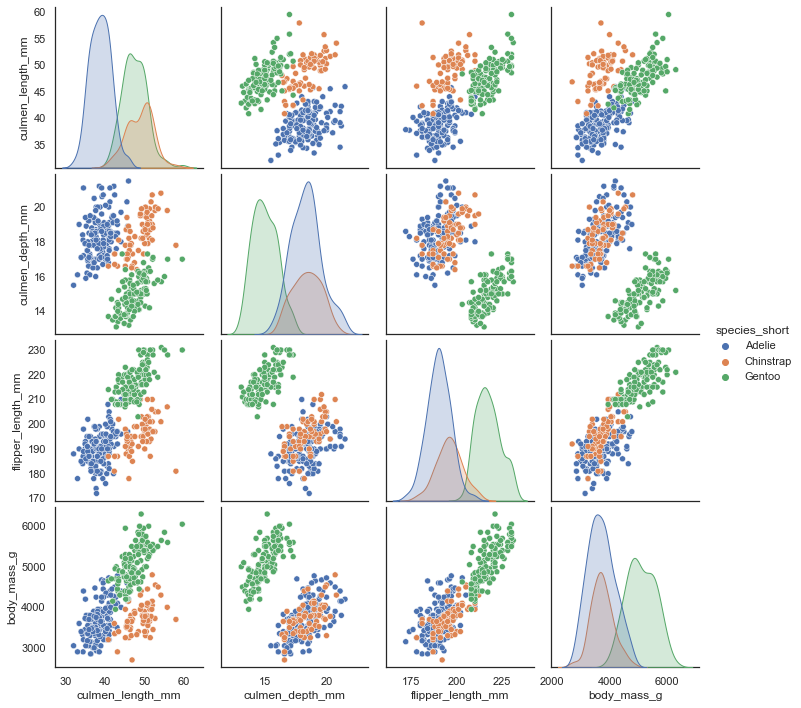

In [8]:
sns.pairplot(penguins, hue='species_short')

In [9]:
import umap

In [10]:
reducer = umap.UMAP()

In [11]:
penguins.head()

species_short     island  culmen_length_mm  culmen_depth_mm  \
0        Adelie  Torgersen              39.1             18.7   
1        Adelie  Torgersen              39.5             17.4   
2        Adelie  Torgersen              40.3             18.0   
4        Adelie  Torgersen              36.7             19.3   
5        Adelie  Torgersen              39.3             20.6   

   flipper_length_mm  body_mass_g     sex  
0              181.0       3750.0    MALE  
1              186.0       3800.0  FEMALE  
2              195.0       3250.0  FEMALE  
4              193.0       3450.0  FEMALE  
5              190.0       3650.0    MALE

In [12]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [13]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(334, 2)

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

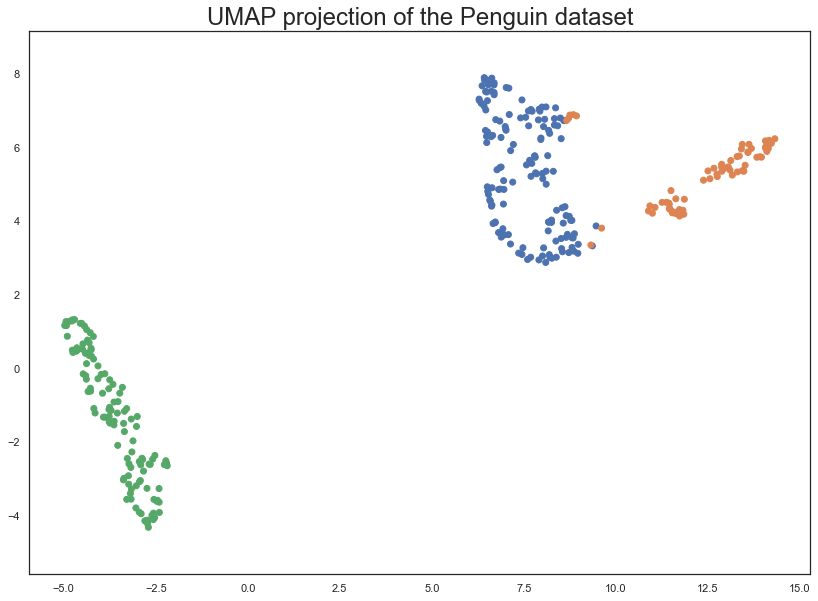

In [14]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

In [ ]:
https://projector.tensorflow.org/